In [ ]:
!pip install konlpy --upgrade
!pip install tqdm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 37.9 MB/s eta 0:00:00


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: title={'center': '한글'}>

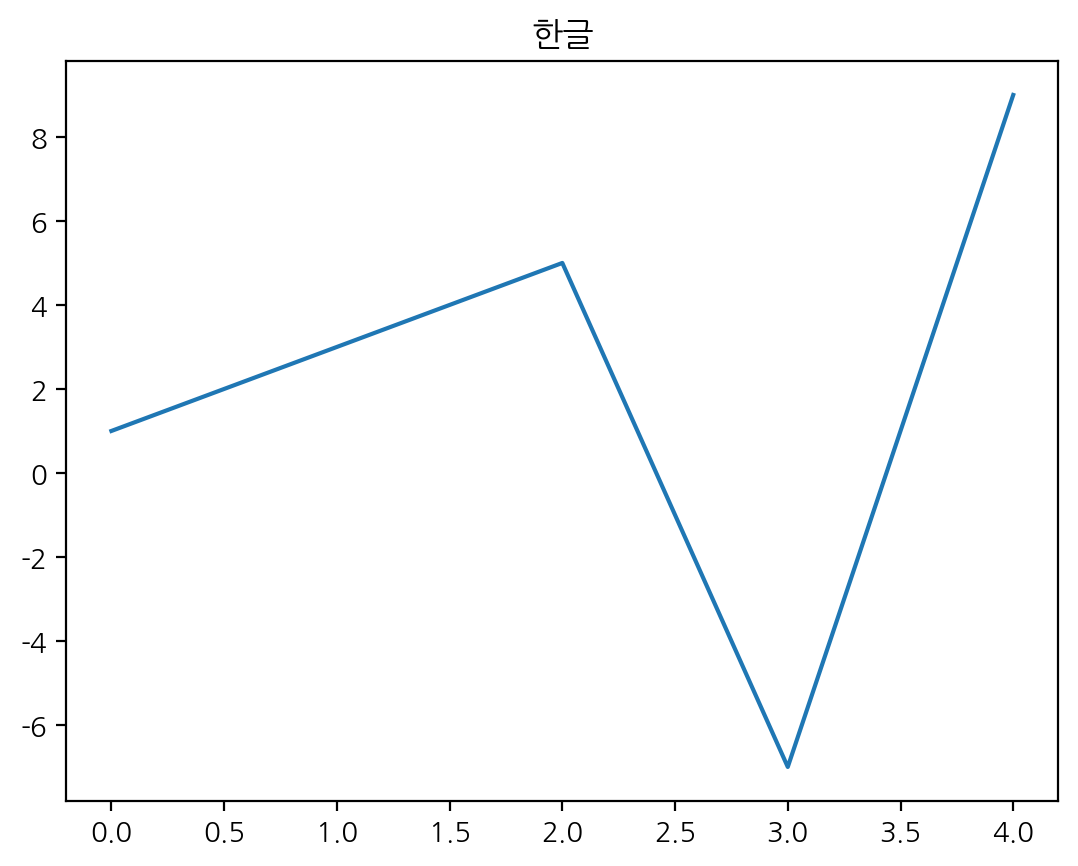

In [ ]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'
pd.Series([1,3,5,-7,9]).plot(title='한글')

In [ ]:
reviews = pd.read_csv('./shampoo_final2.csv', encoding='utf-8', index_col=0)
reviews

,리뷰,평점,긍정부정,리뷰길이
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510
...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176


## 데이터 전처리

In [ ]:
import re

def remove_words(text):
    cleaned = re.sub(r'[^\w\s]', '', text) # 특수문자 제거
    cleaned = re.sub(r'(ㅋ+|ㅎ+|ㅠ+|ㅜ+)', '', cleaned) # ㅋ,ㅎ,ㅠ,ㅜ 1개 이상 반복될 경우 제거
    cleaned = re.sub(r'\s+', ' ', text) # 띄어쓰기 여러번 반복될 경우 제거
    cleaned = cleaned.strip() # 앞뒤 공백 제거
    return cleaned

In [ ]:
reviews['리뷰'] = reviews['리뷰'].apply(remove_words)
reviews

,리뷰,평점,긍정부정,리뷰길이
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510
...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10280
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      10279 non-null  object
 1   평점      10279 non-null  int64 
 2   긍정부정    10279 non-null  object
 3   리뷰길이    10279 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 401.5+ KB


## EDA

In [ ]:
grade_y = reviews[reviews['긍정부정'] == 'y'].groupby('평점')['긍정부정'].count().reset_index()
grade_n = reviews[reviews['긍정부정'] == 'n'].groupby('평점')['긍정부정'].count().reset_index()

merged_df = pd.merge(grade_y, grade_n, on='평점', suffixes=('_y', '_n'), how='outer')

merged_df = merged_df.fillna(0)

merged_df['총합'] = merged_df['긍정부정_y'] + merged_df['긍정부정_n']
merged_df['긍정비율'] = (merged_df['긍정부정_y'] /(merged_df['긍정부정_y'] + merged_df['긍정부정_n']) * 100).round(2)
merged_df['부정비율'] = (merged_df['긍정부정_n'] /(merged_df['긍정부정_y'] + merged_df['긍정부정_n']) * 100).round(2)

merged_df.set_index('평점', inplace=True)

merged_df

,긍정부정_y,긍정부정_n,총합,긍정비율,부정비율
평점,,,,,
1,23,1160,1183,1.94,98.06
2,50,1118,1168,4.28,95.72
3,1176,1324,2500,47.04,52.96
4,2258,447,2705,83.48,16.52
5,2661,61,2722,97.76,2.24


In [ ]:
# 평점1에서 긍정인 경우 추출
star1_y = reviews[(reviews['평점']== 1) & (reviews['긍정부정'] == 'y')]
star1_y


,리뷰,평점,긍정부정,리뷰길이
125,재구매했어요 잘 사용 중입니다 사춘기 소녀 분들에게 좋습니다,1,y,30
160,거품도 풍부하고 기름기도 쫙 빼줘서 좋고 염증도 어느 정도 가라앉은 거 같아요 사용...,1,y,69
189,머리결이 부드럽고 세척력이 뛰어나네요,1,y,20
300,샴푸는 맘에 듭니다 근데 보낼 때 확인 안 합니까 두 개 중 한 개는 덜 잠겨서 샴...,1,y,66
374,그럭저럭 괜찮은 것 같음,1,y,12
425,암튼 계속 려만 사용 중이요,1,y,14
432,포장도 잘해서 왔어요,1,y,11
478,가격도 저렴하고 배송도 빠르고 만족합니다,1,y,22
488,쿠폰 사용해서 저렴하게 잘 샀어요,1,y,18
493,머리결이 한결 좋아졌어요,1,y,13


In [ ]:
# 평점2에서 긍정인 경우 추출
star2_y = reviews[(reviews['평점']== 2) & (reviews['긍정부정'] == 'y')]
star2_y

,리뷰,평점,긍정부정,리뷰길이
1187,생각보다 아주 흡족은 아니지만 괜찮습니다,2,y,25
1211,계속 사용 중인 제품이예요 제품은 만족하지만 배송 때문에 별 뺐어 요주문하고 주만에...,2,y,84
1236,두피가 상쾌해요 효과가 있었으면 좋겠네요,2,y,23
1253,두피가 건조하고 각질이 많이 일어나 서 구매했는데 이틀 사용한 결과 각질이 꾀 남아...,2,y,74
1261,당장 효과보는 건 아닌데 향이 좋네요,2,y,17
1269,트리트먼트도 사보고 싶네요 염색은 빨리 빼지지만 좋은 거 같아요,2,y,29
1329,유통기한이 올해 월까지라 부지런히 써야겠더라구 요세통만 주문했으니 가능은 할 거 같...,2,y,146
1365,늘 쓰는 제품이에요 머리 기름낄 때 사용하니 좋아 요 청소년기 사용 적합해요,2,y,42
1366,쓰던 제품이라서 만족하는 데 배송이 세고 난 리났어요 이거 쓰고 두피염비듬다나았어요...,2,y,60
1408,감사합니다 항상 주문하는 상품입니다 다들 아시는 상품이니 뭐 이젠 왠지 집안에 항상...,2,y,129


In [ ]:
# 평점5에서 부정인 경우 추출
star5_n = reviews[(reviews['평점']== 5) & (reviews['긍정부정'] == 'n')]
star5_n

,리뷰,평점,긍정부정,리뷰길이
7919,아직 사용은 안 했지만 엘라스틴 베이직은 향을 오래전부터 좋아해서 주문했어요 섬유유...,5,n,55
8088,저렴하게 구입합니다,5,n,11
8091,향은 오래가고 좋은데 제 두피에는 안 맞네요,5,n,23
8094,항상 사용하는 제품입니다,5,n,13
8096,비싸긴 한데 써보니 좋아서 구매했어요,5,n,20
...,...,...,...,...
10054,트리트먼트 헤어 에센스 랑세트로 쓰려고 샴푸도 이 라인으로 샀습니다 인터넷으로 샴푸...,5,n,155
10067,일단 오프라인보다 가격이 저렴해서 마음에 들고 예전에 사용해본 경험을 기준으로 말씀...,5,n,231
10192,아직 개봉전이긴 한데 단백질 앰플이 너무 효과 있고 좋았었어요 미용실 원장님도 관리...,5,n,199
10270,탈색했던 모발이 아직까지 남아 있고 그 때문인지 진짜 새로 자라나는 머리 빼고 나머...,5,n,301


1. 평점 1, 2점 중 긍정인 경우 상품성에 만족하긴 함
2. 평점 5에서 부정인 경우는 긍정 부정 나누는 기준 중 하나인 상품을 사용해보지 않고 좋다고 한 경우 부정처리 한 게 좀 많음

## 형태소 단위로 분리

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

# 조사, 어미 제거, 어간 추출

def okt_clean(text):
  clean_text = []
  for word in okt.pos(text, stem=True):
    if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
      clean_text.append(word[0])

  return ' '.join(clean_text)

tqdm.pandas()

reviews['형태소'] = reviews['리뷰'].progress_map(okt_clean)

reviews

100%|██████████| 10279/10279 [01:33<00:00, 109.38it/s]


,리뷰,평점,긍정부정,리뷰길이,형태소
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52,진짜 머리 감고 나다 너무 너무 간지럽다 요 상쾌하다 오래 가지 못 냄새 빨리
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50,비듬 생기다 어쩐지 간지럽다 개 사다 누구 주지 못 아오
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40,뚜껑 펌프 고장 나다 아무리 누르다 안 나오다 뚜껑 열다 사용 하다 방치 하다
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27,머리카락 부담 안 되다 머리 피부 부담 안 되다 좋다
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510,샴푸 사용 해보다 살수 없다 오랜 기간 동안 고민 하다 리뷰 들 꼼꼼하다 보다 저 ...
...,...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222,단백질 샴푸 첫 구매 이다 대다 넘어가다 탈모 신경 쓰이다 그래서 탈모 샴푸 사용 ...
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223,개인 적 단백질 본드 샴푸 세트 몇 년 동안 사용 중 머릿결 윤기 돌다 요 주 기적...
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126,두피 예민하다 각질 많다 요 티 트리 샴푸 좋다 하다 구매 해봤다 성분 좋다 시중 ...
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176,두피 좋다 제품 들 거품 많이 안 나다 이 제품 거품 진짜 풍 성하다 세 정력 좋다...


## 불용어 제거

In [ ]:

def remove_stopwords(text):
  tokens = text.split(' ')
  stopwords = ['진짜', '너무', '어쩐지', '개', '아오', '나다', '하다', '아무리', '니', '조', '랄', '누구', '유','분', '거', '듯', '날', '저','당', '감', '요', '여', '오', '요즘', '누군가', '누가', '두', '이다', '뚝', '똑', '풍',
             '제', '저희', '이', '좀', '중', '다시', '용', '적', '스럽다', '것','다', '같다', '네', '음', '흠', '혹시', '바로', '다만', '가량', '고', '평소', '하', '후', '통', '세', '정력' ]
  meaningful_words = [w for w in tokens if not w in stopwords]
  return ' '.join(meaningful_words)

reviews_mean = reviews.copy()

reviews_mean['형태소'] = reviews_mean['형태소'].map(remove_stopwords)
reviews_mean

,리뷰,평점,긍정부정,리뷰길이,형태소
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52,머리 감고 간지럽다 상쾌하다 오래 가지 못 냄새 빨리
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50,비듬 생기다 간지럽다 사다 주지 못
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40,뚜껑 펌프 고장 누르다 안 나오다 뚜껑 열다 사용 방치
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27,머리카락 부담 안 되다 머리 피부 부담 안 되다 좋다
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510,샴푸 사용 해보다 살수 없다 오랜 기간 동안 고민 리뷰 들 꼼꼼하다 보다 두피 고민...
...,...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222,단백질 샴푸 첫 구매 대다 넘어가다 탈모 신경 쓰이다 그래서 탈모 샴푸 사용 미용실...
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223,개인 단백질 본드 샴푸 세트 몇 년 동안 사용 머릿결 윤기 돌다 주 기적 뿌리 매직...
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126,두피 예민하다 각질 많다 티 트리 샴푸 좋다 구매 해봤다 성분 좋다 시중 샴푸 들 ...
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176,두피 좋다 제품 들 거품 많이 안 제품 거품 성하다 좋다 조금 써다 아주 기분 좋다...


In [ ]:
reviews_mean.loc[7841, '긍정부정'] = 'y'

In [ ]:
# y=1, n=0으로 변경

reviews_mean['긍정부정'] = reviews_mean['긍정부정'].replace({'y':1, 'n':0})
reviews_mean.head()

,리뷰,평점,긍정부정,리뷰길이,형태소
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,0,52,머리 감고 간지럽다 상쾌하다 오래 가지 못 냄새 빨리
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,0,50,비듬 생기다 간지럽다 사다 주지 못
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,0,40,뚜껑 펌프 고장 누르다 안 나오다 뚜껑 열다 사용 방치
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,0,27,머리카락 부담 안 되다 머리 피부 부담 안 되다 좋다
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,0,510,샴푸 사용 해보다 살수 없다 오랜 기간 동안 고민 리뷰 들 꼼꼼하다 보다 두피 고민...


In [ ]:
reviews_mean['긍정부정'] = reviews_mean['긍정부정'].astype(int)
reviews_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10280
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      10279 non-null  object
 1   평점      10279 non-null  int64 
 2   긍정부정    10279 non-null  int64 
 3   리뷰길이    10279 non-null  int64 
 4   형태소     10279 non-null  object
dtypes: int64(3), object(2)
memory usage: 739.9+ KB


# 형태소 / 긍정부정 분류

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X= reviews_mean['형태소']
y= reviews_mean['긍정부정']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
6956     손상 모라 좋다 샴푸 써다 보고 아직 정착 못 올리브영 추천 샴푸 베스트 길 믿다 ...
10152    원래 의심 많다 광고 보고 덥석 뭘 사다 않다 제품 미니 사이즈 먼저 사서 써다 보...
9852                                  항상 쓰다 있다 샴푸 예 향 맘 들다
5381     샴푸 분방 치가 중요하다 포인트 처음 모르다 씻다 효과 자다 모르다 씻다 쿨링 효과...
9824                                     좋다 머릿결 푸석하다 않다 좋다
                               ...                        
5736       팬틴 사용 걸 바꾸다 맘 들다 몇 째 계속 사용 해오다 있다 읍니 앞 쭈욱 사용 예정
5193                                       가격 대비 질 좋다 만족하다
5392     후기 이제야 남기다 각질 많다 두피 그래서 샴푸 사서 쓰다 있다 매번 실패하다 그러...
860      택배 배달 샴푸 새다 나오다 건지다 포장 잘못 건지다 자다 모르다 택배 받다 말 자...
7272                                          재다 좋다 배송 빠르다
Name: 형태소, Length: 7195, dtype: object

X_test:
8606    일 되다 아가 키우다 맘 요원 타다 쿨링 샴푸 사용 앙 방쿨링 샴푸 알 되어다 구매...
2923    린스 땐 은지 안 좋다 자다 모르다 말리 나서다 머릿결 만지다 보다 별로 부드럽다 ...
9801                                          재다 유통 기한 기다
7324    모 링 향 은은하다 ᆢ 순하다 느낌 많이 들다 일반 탈모 샴푸 사용 뻣뻣하다 느낌 ...
33                    펌핑기 안 열리다 못 쓰다 있다 돌리다 목 짧다 쓸다 수가 없다
    

## TF-IDF 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer=None,
                               ngram_range = (1,2),
                               min_df = 0.01, # 문서에 5% 미만으로 나타나는 단어 제외
                               max_df = 0.95 # 문서에 95% 이상 나오는 단어 제외
                                )

tfidf_vector.fit(X_train)



TfidfVectorizer(max_df=0.95, min_df=0.01, ngram_range=(1, 2))

In [ ]:
train_tfidf = tfidf_vector.transform(X_train)
test_tfidf = tfidf_vector.transform(X_test)

train_tfidf.shape, test_tfidf.shape

((7195, 378), (3084, 378))

In [ ]:
vocab = tfidf_vector.get_feature_names_out()
vocab

array(['가격', '가격 대비', '가격 저렴하다', '가다', '가려움', '가려움증', '가렵', '가성', '가족',
       '가지', '각질', '간지럽다', '감고', '감고 나서다', '감다', '감사하다', '강하다', '같이',
       '개선', '개운하다', '개인', '거의', '거품', '거품 많이', '거품 성하다', '거품 자다',
       '거품 풍부하다', '걱정', '건조하다', '건지다', '검색', '계속', '계속 사용', '고민', '관리',
       '광고', '괜찮다', '구매', '구매 해봤다', '구입', '그냥', '그래도', '그래서', '그렇다',
       '그리고', '근데', '금방', '기다', '기대', '기대하다', '기르다', '기름', '기름기', '기분',
       '기분 좋다', '기존', '기한', '깔끔하다', '깨끗하다', '꼼꼼하다', '꾸준하다', '꾸준하다 사용',
       '꾸준하다 써다', '끄다', '나쁘다', '나쁘다 않다', '나서다', '나오다', '남다', '남편', '내용물',
       '냄새', '냄새 좋다', '넉넉하다', '넘다', '느껴지다', '느끼다', '느낌', '느낌 들다', '느낌 있다',
       '다른', '다른 샴푸', '다른 제품', '다음', '닥터', '대비', '덜하다', '도움', '도움 되다',
       '도착', '돼다', '되다', '되어다', '되어다 있다', '두피', '두피 시원하다', '두피 자극',
       '두피 좋다', '드리다', '들다', '들어가다', '따로', '때문', '떨어지다', '뚜껑', '라보', '리뷰',
       '린스', '마음', '마음 들다', '만족', '만족스럽다', '만족하다', '많다', '많이', '많이 빠지다',
       '말다', '맞다', '매일', '맥주', '맥주 효모', '머리', '머리 감고', '머리 감다', '머리 많이'

In [ ]:
dist = np.sum(train_tfidf, axis=0)

vocab_counts = pd.DataFrame(dist, columns=vocab)
vocab_counts = vocab_counts.sort_values(by=0, axis=1, ascending=False)
vocab_counts

,좋다,샴푸,사용,자다,쓰다,있다,머리,두피,써다,보다,...,가지,매일,제일,느낌 들다,샴푸 찾다,되어다 있다,하니,충분하다,효모 샴푸,증상 완화
0,685.419668,424.93656,392.423245,373.97574,342.396339,327.447213,298.708645,284.300698,275.387853,263.23908,...,18.324194,17.881029,17.812027,17.504366,17.394858,17.348841,17.033827,16.884134,16.143824,13.415043


## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, # 결정트리 개수
                               n_jobs = -1, # 사용할 코어의 수, -1인 경우 모든 코어 사용
                               random_state = 42)
model

RandomForestClassifier(n_jobs=-1, random_state=42)

## 교차검증

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, train_tfidf, y_train, cv=3, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.8s finished


In [ ]:
# 정확도

accuracy = (y_pred == y_train).mean()
accuracy

0.8296038915913829

## 학습

In [ ]:
model.fit(train_tfidf, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_predict = model.predict(test_tfidf)
y_predict

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8343060959792478

## 워드 임베딩 + TF IDF 벡터화  

In [ ]:
!pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np


# 워드 임베딩 학습

w2c_size = 100 # 임베딩 벡터 크기
w2c_model = Word2Vec(sentences = X_train, vector_size = w2c_size, window=5, min_count = 1, workers =4)
w2c_model.train(X_train, total_examples = len(X_train), epochs=10)


# TD-IDF 계산

tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False)
tfidf_vectorizer.fit(X_train)
tfidf_train = tfidf_vectorizer.transform(X_train)


# TF-IDF 적용

def weighted_vector(tokens, tfidf):
  vec = np.zeros(w2c_size)
  weight_sum=0
  for word, weight in list(zip(tokens, tfidf.toarray()[0])):
    if word in w2c_model.wv:
      vec += w2c_model.wv[word] * weight
      weight_sum += weight

    if weight_sum != 0:
      vec /= weight_sum
    return vec

X_train_w2c_tfidf = [weighted_vector(tokens, tfidf) for tokens, tfidf in zip(X_train, tfidf_train)]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tfidf_test = tfidf_vectorizer.transform(X_test)
X_test_w2c_tfidf = [weighted_vector(tokens, tfidf) for tokens, tfidf in zip(X_test, tfidf_test)]

# 랜덤포레스트 학습
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_w2c_tfidf, y_train)

# 예측
y_pred = rf_classifier.predict(X_test_w2c_tfidf)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print('랜덤 포레스트 예측 정확도: ', accuracy)


# 교차검증
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train_w2c_tfidf, y_train, cv=5, scoring='accuracy')

print('교차검증 점수: ', cv_scores)
print('평균 정확도: ', cv_scores.mean())
print('표준편차: ', cv_scores.std())

랜덤 포레스트 예측 정확도:  0.6498054474708171
교차검증 점수:  [0.64975678 0.66157054 0.6580959  0.64280751 0.62821404]
평균 정확도:  0.6480889506601807
표준편차:  0.011896046658251936


## 1차 모델링 결과
- 워드 임베딩 & TF-IDF 보다 TF-IDF 단독으로 사용했을 때 예측 정확도가 더 높음 (약 64% vs 약 83%) >> TF-IDF 단독 사용
- 다른 모델도 사용..해보자..


## 모델 성능 비교
- 랜덤포레스트, 나이브베이즈, 로지스틱 회귀, 릿지 회귀

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


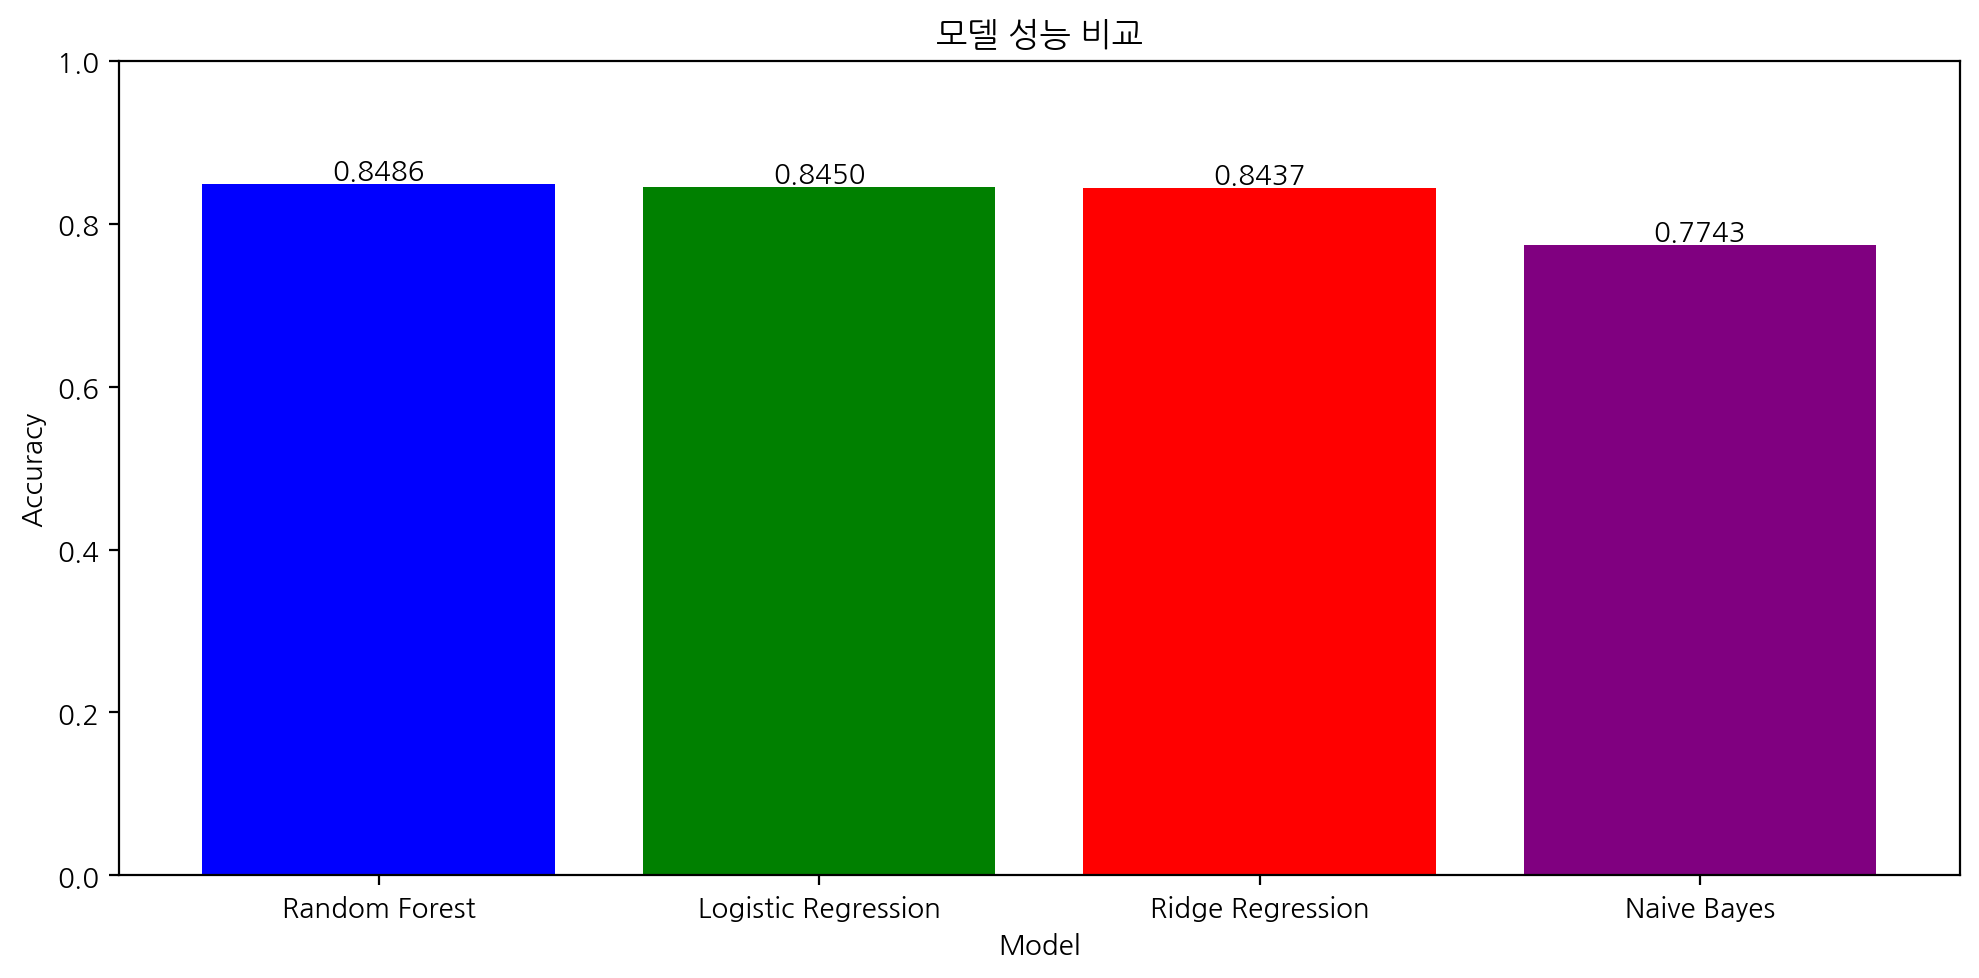

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score


# TD-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False)
tfidf_vectorizer.fit(X_train)  # 학습 데이터에만 fit 적용
tfidf_train = tfidf_vectorizer.transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)  # 테스트 데이터에는 transform만 적용

# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(tfidf_train, y_train)
  y_pred = model.predict(tfidf_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



## 모델링 비교 결과
- 랜덤 포레스트, 로지스틱 회귀, 릿지 회귀 셋 다 비슷한 성능을 보임
- 그 중 가장 성능이 높은 랜덤 포레스트로 모델링 진행

In [ ]:
predicted_df = reviews_mean.loc[X_test.index].copy()
predicted_df['예측 감성'] = y_pred
predicted_df = predicted_df.drop(columns='형태소', axis=1)

predicted_df

,리뷰,평점,긍정부정,리뷰길이,예측 감성
8606,일된 아가를 키우는 맘이에 요원래 타사 쿨링 샴푸를 사용하던 중에 앙방쿨링 샴푸를 ...,5,1,311,1
2923,린스할 땐 은지 안 좋은지 잘 모르겠는데 말리고 나서 머릿결 만져보니 별로 부드럽진...,3,0,74,0
9801,재구매입니다 유통기한 길어요,5,1,18,1
7324,모링가 향이 은은하게 나면서 ᆢ순하다는 느낌이 많이 들었어요 일반 탈모 샴푸는 사용...,4,1,129,1
33,펌핑기가 안 열려서 못 쓰고 있어요 아무리 돌려도 목이 짧아 쓸 수가 없어요,1,0,41,0
...,...,...,...,...,...
706,머리카락 끝이 엉키고 비듬 그대로 그냥 아까워서 쓰고 있어 요 두피 여드름도 그대로...,1,0,93,0
2974,사용 전이긴 하지만 잘 사용할께요나하고 잘 맞기를 바래요,3,0,31,1
9901,아직 쓰던 샴푸가 좀 남아 있지만 샴푸 샘플이 있어서 샘플 샴푸랑 트리트먼트 써봤어...,5,1,312,1
6223,좋아요 향도 좋고 거품도나 구용,4,1,15,1


In [ ]:
predicted_diff = predicted_df[(predicted_df['긍정부정']) != (predicted_df['예측 감성'])]
predicted_diff

,리뷰,평점,긍정부정,리뷰길이,예측 감성
1026,택배 박스가 재포장돼 있어 열어보니 신문지로 감싸져 있고 하나가 깨져서 왔네요,1,0,42,1
4708,무난하게 쓰기 좋아요 아직까지 머리가 덜 빠진다던가 그런 건 잘 모르겠어요,3,1,40,0
96,완전짜증머리가 더 빠짐 탈모 샴푸라고 하지 마세요 빨래용으로 쓰고 있습니다,1,0,37,1
5534,지인 추천으로 구매했어요 써보고 좋으면 계속 구매하겠죠,4,0,29,1
4687,샘플받은 게 좋아서 샀는데,3,0,16,1
...,...,...,...,...,...
6201,향도 좋고 세정력 좋고 다른 샴푸 이 비해 시간이 지났을 때 유분이 덜 생기긴 하나...,4,1,115,0
1491,가격만 보고 급하게 샀는데 유통기한이 이거 참 난감하네요,2,0,39,1
5962,택배 파업 중인데 빠르게 잘 받았어요,4,1,19,0
2756,배송 빨랐어요 아직은 써봐야 알 것 같네요,3,1,21,0


---

# '형태소' / '평점' 분류

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X= reviews_mean['형태소']
y= reviews_mean['평점']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
6956     손상 모라 좋다 샴푸 써다 보고 아직 정착 못 올리브영 추천 샴푸 베스트 길 믿다 ...
10152    원래 의심 많다 광고 보고 덥석 뭘 사다 않다 제품 미니 사이즈 먼저 사서 써다 보...
9852                                  항상 쓰다 있다 샴푸 예 향 맘 들다
5381     샴푸 분방 치가 중요하다 포인트 처음 모르다 씻다 효과 자다 모르다 씻다 쿨링 효과...
9824                                     좋다 머릿결 푸석하다 않다 좋다
                               ...                        
5736       팬틴 사용 걸 바꾸다 맘 들다 몇 째 계속 사용 해오다 있다 읍니 앞 쭈욱 사용 예정
5193                                       가격 대비 질 좋다 만족하다
5392     후기 이제야 남기다 각질 많다 두피 그래서 샴푸 사서 쓰다 있다 매번 실패하다 그러...
860      택배 배달 샴푸 새다 나오다 건지다 포장 잘못 건지다 자다 모르다 택배 받다 말 자...
7272                                          재다 좋다 배송 빠르다
Name: 형태소, Length: 7195, dtype: object

X_test:
8606    일 되다 아가 키우다 맘 요원 타다 쿨링 샴푸 사용 앙 방쿨링 샴푸 알 되어다 구매...
2923    린스 땐 은지 안 좋다 자다 모르다 말리 나서다 머릿결 만지다 보다 별로 부드럽다 ...
9801                                          재다 유통 기한 기다
7324    모 링 향 은은하다 ᆢ 순하다 느낌 많이 들다 일반 탈모 샴푸 사용 뻣뻣하다 느낌 ...
33                    펌핑기 안 열리다 못 쓰다 있다 돌리다 목 짧다 쓸다 수가 없다
    

## 모델 성능 비교

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


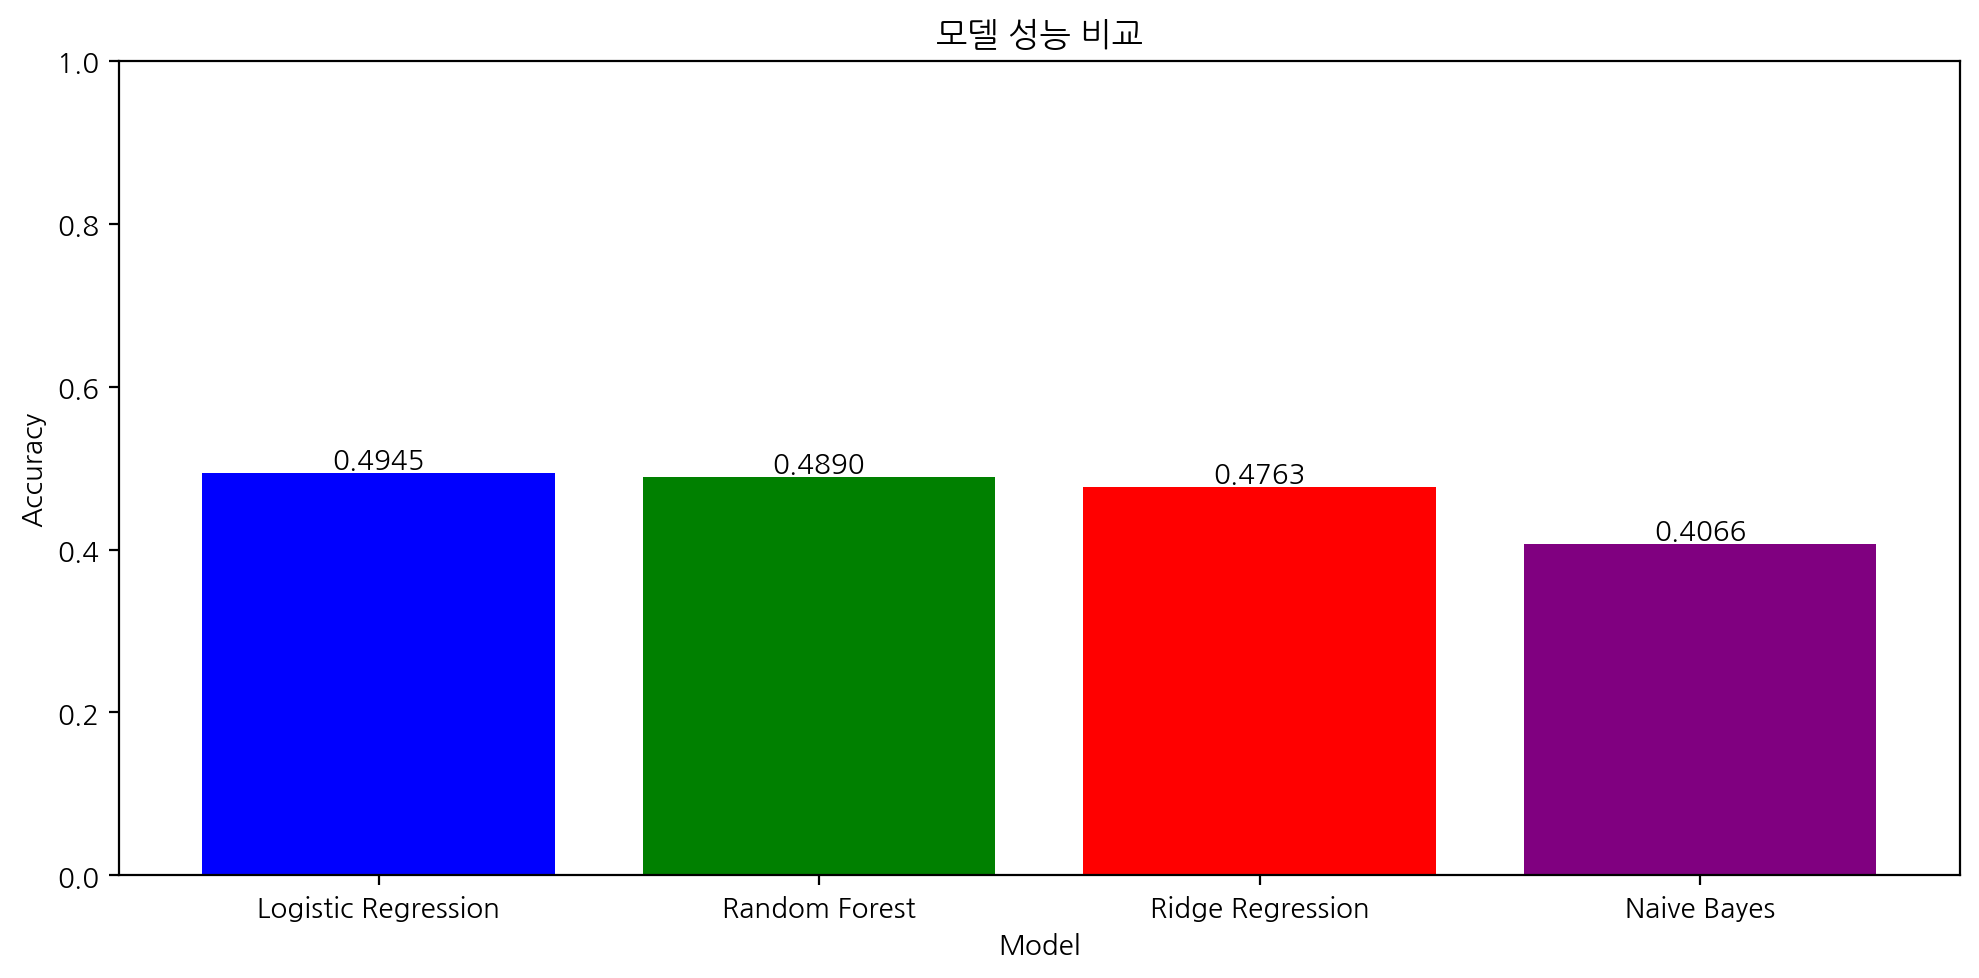

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score


# TD-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False)
tfidf_vectorizer.fit(X_train)  # 학습 데이터에만 fit 적용
tfidf_train = tfidf_vectorizer.transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)  # 테스트 데이터에는 transform만 적용

# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(tfidf_train, y_train)
  y_pred = model.predict(tfidf_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 모델링 비교 결과
- 예측력이 그리 높지 않은 것 같으나 로지스틱 회귀가 그나마 높음


In [ ]:
predicted_df2 = reviews_mean.loc[X_test.index].copy()
predicted_df2['예측 평점'] = y_pred
predicted_df2 = predicted_df2.drop(columns='형태소', axis=1)

predicted_df2

,리뷰,평점,긍정부정,리뷰길이,예측 평점
8606,일된 아가를 키우는 맘이에 요원래 타사 쿨링 샴푸를 사용하던 중에 앙방쿨링 샴푸를 ...,5,1,311,5
2923,린스할 땐 은지 안 좋은지 잘 모르겠는데 말리고 나서 머릿결 만져보니 별로 부드럽진...,3,0,74,5
9801,재구매입니다 유통기한 길어요,5,1,18,4
7324,모링가 향이 은은하게 나면서 ᆢ순하다는 느낌이 많이 들었어요 일반 탈모 샴푸는 사용...,4,1,129,5
33,펌핑기가 안 열려서 못 쓰고 있어요 아무리 돌려도 목이 짧아 쓸 수가 없어요,1,0,41,1
...,...,...,...,...,...
706,머리카락 끝이 엉키고 비듬 그대로 그냥 아까워서 쓰고 있어 요 두피 여드름도 그대로...,1,0,93,1
2974,사용 전이긴 하지만 잘 사용할께요나하고 잘 맞기를 바래요,3,0,31,3
9901,아직 쓰던 샴푸가 좀 남아 있지만 샴푸 샘플이 있어서 샘플 샴푸랑 트리트먼트 써봤어...,5,1,312,5
6223,좋아요 향도 좋고 거품도나 구용,4,1,15,4


In [ ]:
predicted_diff_star = predicted_df2[(predicted_df2['평점']) != (predicted_df2['예측 평점'])]
predicted_diff_star

,리뷰,평점,긍정부정,리뷰길이,예측 평점
2923,린스할 땐 은지 안 좋은지 잘 모르겠는데 말리고 나서 머릿결 만져보니 별로 부드럽진...,3,0,74,5
9801,재구매입니다 유통기한 길어요,5,1,18,4
7324,모링가 향이 은은하게 나면서 ᆢ순하다는 느낌이 많이 들었어요 일반 탈모 샴푸는 사용...,4,1,129,5
1026,택배 박스가 재포장돼 있어 열어보니 신문지로 감싸져 있고 하나가 깨져서 왔네요,1,0,42,4
5241,탈모 예방까지는 아직 잘 모르겠지만 순하고 거품도 잘 나고 전반적으로 만족하며 사용...,4,1,53,3
...,...,...,...,...,...
8609,배송은 늦지만 저렴해서 좋아요,5,1,17,2
1334,판매자가 관리를 안 하는 느낌이에요 고객의 얘기도 안 듣고 그냥 자기 멋대로 강매하...,2,0,74,1
2865,좋아요 좋아요싸고 좋아요,3,1,12,4
1659,제 두피에는 효과 없나 봐요 여전히 간지럽고 각질이 심하고 두피 트러블도 사라지질 ...,2,0,97,1


In [ ]:
predicted_match_star = predicted_df2[(predicted_df2['평점']) == (predicted_df2['예측 평점'])]
predicted_match_star

,리뷰,평점,긍정부정,리뷰길이,예측 평점
8606,일된 아가를 키우는 맘이에 요원래 타사 쿨링 샴푸를 사용하던 중에 앙방쿨링 샴푸를 ...,5,1,311,5
33,펌핑기가 안 열려서 못 쓰고 있어요 아무리 돌려도 목이 짧아 쓸 수가 없어요,1,0,41,1
7745,벤튼이라는 제품을 쓰기 전에는 다른 브랜드 위주로 번째로 만나게 된 브랜드인데 거품...,5,1,470,5
5306,향이 좋아요,4,1,9,4
4708,무난하게 쓰기 좋아요 아직까지 머리가 덜 빠진다던가 그런 건 잘 모르겠어요,3,1,40,3
...,...,...,...,...,...
706,머리카락 끝이 엉키고 비듬 그대로 그냥 아까워서 쓰고 있어 요 두피 여드름도 그대로...,1,0,93,1
2974,사용 전이긴 하지만 잘 사용할께요나하고 잘 맞기를 바래요,3,0,31,3
9901,아직 쓰던 샴푸가 좀 남아 있지만 샴푸 샘플이 있어서 샘플 샴푸랑 트리트먼트 써봤어...,5,1,312,5
6223,좋아요 향도 좋고 거품도나 구용,4,1,15,4


## 3차 모델링
- 예측력이 너무 떨어져서 보완이 필요할 것 같음

# 1, 2, 5점 데이터만 추출해서 모델링

In [ ]:
reviews_125 = reviews_mean[(reviews_mean['평점'] == 1) | (reviews_mean['평점'] == 2) | (reviews_mean['평점'] == 5)]
reviews_125.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 10280
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰      5074 non-null   object
 1   평점      5074 non-null   int64 
 2   긍정부정    5074 non-null   int64 
 3   리뷰길이    5074 non-null   int64 
 4   형태소     5074 non-null   object
dtypes: int64(3), object(2)
memory usage: 237.8+ KB


## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X= reviews_mean['형태소']
y= reviews_mean['평점']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
6956     손상 모라 좋다 샴푸 써다 보고 아직 정착 못 올리브영 추천 샴푸 베스트 길 믿다 ...
10152    원래 의심 많다 광고 보고 덥석 뭘 사다 않다 제품 미니 사이즈 먼저 사서 써다 보...
9852                                  항상 쓰다 있다 샴푸 예 향 맘 들다
5381     샴푸 분방 치가 중요하다 포인트 처음 모르다 씻다 효과 자다 모르다 씻다 쿨링 효과...
9824                                     좋다 머릿결 푸석하다 않다 좋다
                               ...                        
5736       팬틴 사용 걸 바꾸다 맘 들다 몇 째 계속 사용 해오다 있다 읍니 앞 쭈욱 사용 예정
5193                                       가격 대비 질 좋다 만족하다
5392     후기 이제야 남기다 각질 많다 두피 그래서 샴푸 사서 쓰다 있다 매번 실패하다 그러...
860      택배 배달 샴푸 새다 나오다 건지다 포장 잘못 건지다 자다 모르다 택배 받다 말 자...
7272                                          재다 좋다 배송 빠르다
Name: 형태소, Length: 7195, dtype: object

X_test:
8606    일 되다 아가 키우다 맘 요원 타다 쿨링 샴푸 사용 앙 방쿨링 샴푸 알 되어다 구매...
2923    린스 땐 은지 안 좋다 자다 모르다 말리 나서다 머릿결 만지다 보다 별로 부드럽다 ...
9801                                          재다 유통 기한 기다
7324    모 링 향 은은하다 ᆢ 순하다 느낌 많이 들다 일반 탈모 샴푸 사용 뻣뻣하다 느낌 ...
33                    펌핑기 안 열리다 못 쓰다 있다 돌리다 목 짧다 쓸다 수가 없다
    

## 모델 성능 비교

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


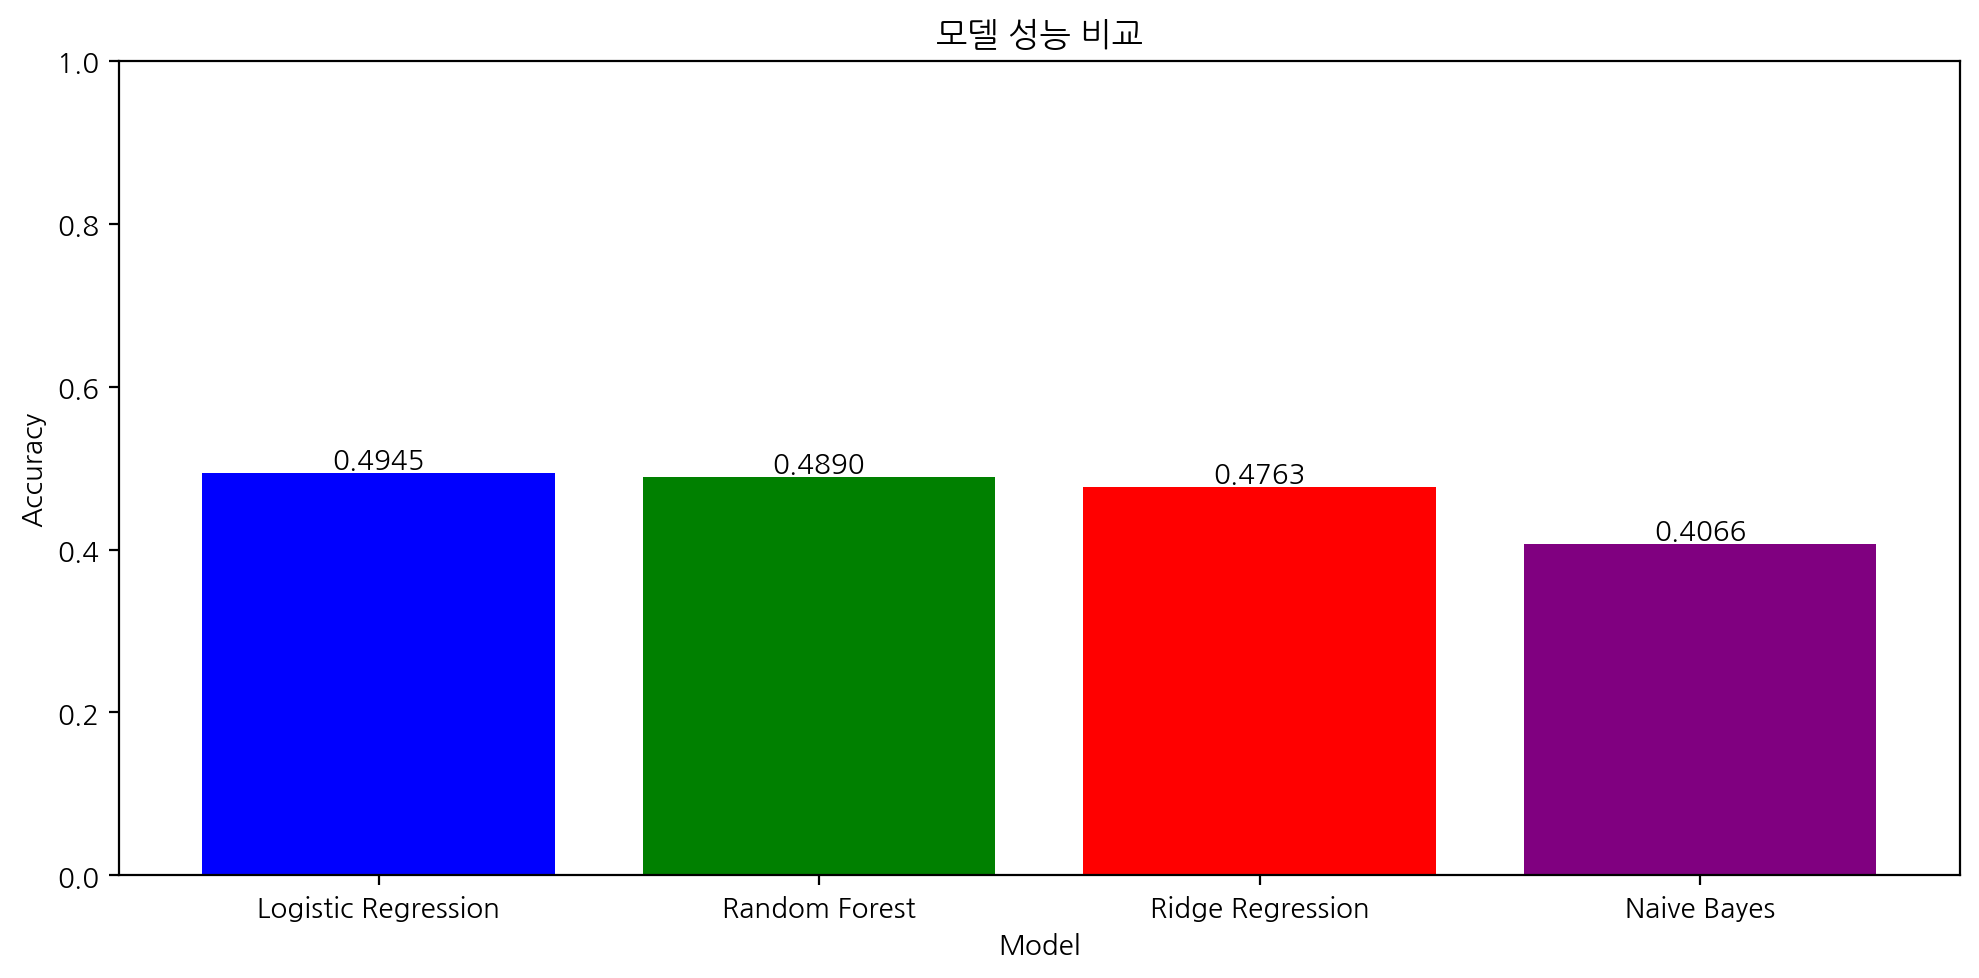

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score


# TD-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False)
tfidf_vectorizer.fit(X_train)  # 학습 데이터에만 fit 적용
tfidf_train = tfidf_vectorizer.transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)  # 테스트 데이터에는 transform만 적용

# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(tfidf_train, y_train)
  y_pred = model.predict(tfidf_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 모델 비교 결과
- 앞서 전체 데이터로 비교한거랑 예측력이 동일함

## 어떻게 해결하지..
1. 다른 모델을 사용해보자 >> Decision Tree
2. 벡터화를 다르게 해보자 >> TFIDF 말고 CountVectorizer

## Decision Tree
- 일단 해석력은 높아진다고 하니.. 해보자..

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False)
tfidf_vectorizer.fit(X)  # X 전체에 대해 fit
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

y_pred = dt_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print('예측 정확도: ', accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


예측 정확도:  0.42250324254215305


## 모델링 결과
- 더 낮아짐 ^_ㅠ (약 42%)

- 토크나이저 방법을 바꿔보자..

# 정규표현식을 통한 토큰화

In [ ]:
reviews = reviews.drop(columns='형태소', axis=1)
reviews

,리뷰,평점,긍정부정,리뷰길이
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510
...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176


## 새로운 토큰화
- "단어 + ' ' + 단어 + ' ' + 단어" 형식으로 묶어서 토큰화
- 슬라이딩 윈도우 방식 사용

In [ ]:
def sliding_window_tokenizer(text, window_size=3): #단어 3개 조합 >> 단어 개수 변경하려면 window_size 변경
  tokens = text.split() #띄어쓰기로 분리
  grouped_tokens = []

  for i in range(len(tokens) - window_size + 1):
    grouped_token = ' '.join(tokens[i : i + window_size])
    grouped_tokens.append(grouped_token)

  return grouped_tokens

# 함수 적용

reviews_3words = reviews.copy()
reviews_3words['토큰화'] = reviews_3words['리뷰'].apply(sliding_window_tokenizer)

reviews_3words

,리뷰,평점,긍정부정,리뷰길이,토큰화
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,n,52,"[진짜 머리 감고, 머리 감고 나면, 감고 나면 너무, 나면 너무 너무, 너무 너무..."
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,n,50,"[비듬 생겼어요 어쩐지간지럽더라, 생겼어요 어쩐지간지럽더라 개나, 어쩐지간지럽더라 ..."
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,n,40,"[뚜껑 펌프 고장, 펌프 고장 났네요, 고장 났네요 아무리, 났네요 아무리 눌러도,..."
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,n,27,"[머리카락에 부담이 안, 부담이 안 되고, 안 되고 머리, 되고 머리 피부에, 머리..."
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,n,510,"[샴푸는 사용해보고 살수가, 사용해보고 살수가 없으니, 살수가 없으니 오랜, 없으니..."
...,...,...,...,...,...
10276,단백질 샴푸 첫 구매입니다 대 넘어가니 탈모에만 신경이 쓰이고 그래서 탈모샴푸만 사...,5,y,222,"[단백질 샴푸 첫, 샴푸 첫 구매입니다, 첫 구매입니다 대, 구매입니다 대 넘어가니..."
10277,개인적으로 단백질 본드 샴푸세트를 몇 년 동안 사용 중인데 머릿결이 윤기가 돌아 요...,5,y,223,"[개인적으로 단백질 본드, 단백질 본드 샴푸세트를, 본드 샴푸세트를 몇, 샴푸세트를..."
10278,두피가 예민하고 각질이 많아 요티트리 샴푸가 좋다고 해서 구매해봤어요 성분이 좋아서...,5,y,126,"[두피가 예민하고 각질이, 예민하고 각질이 많아, 각질이 많아 요티트리, 많아 요티..."
10279,두피에 좋은 제품들이 거품이 많이 안 난다는데 이 제품은 거품 진짜 풍성하고 세정력...,5,y,176,"[두피에 좋은 제품들이, 좋은 제품들이 거품이, 제품들이 거품이 많이, 거품이 많이..."


- 불용어 처리가 너무 어렵겠는데.. 흠..
- 형태소 단위로 토큰화 된 데이터로 단어 3개씩 조합해볼까
- 아니면 n-gram으로..?

## n-gram 적용

In [ ]:
reviews_mean.head()

,리뷰,평점,긍정부정,리뷰길이,형태소
0,진짜 머리 감고 나면 너무 너무 간지러워 요상쾌함이 오래가지도 못하고 냄새도 빨리 나요,1,0,52,머리 감고 간지럽다 상쾌하다 오래 가지 못 냄새 빨리
1,비듬 생겼어요 어쩐지간지럽더라 개나 샀는데 누구 주지도 못하고 아오,1,0,50,비듬 생기다 간지럽다 사다 주지 못
2,뚜껑 펌프 고장 났네요 아무리 눌러도 안 나와서 뚜껑 열고 사용하다 방치했어요,1,0,40,뚜껑 펌프 고장 누르다 안 나오다 뚜껑 열다 사용 방치
3,머리카락에 부담이 안 되고 머리 피부에 부담이 안 되니 좋죠,1,0,27,머리카락 부담 안 되다 머리 피부 부담 안 되다 좋다
4,샴푸는 사용해보고 살수가 없으니 오랜 기간 동안 고민했고 리뷰들도 꼼꼼히 보았는데 ...,1,0,510,샴푸 사용 해보다 살수 없다 오랜 기간 동안 고민 리뷰 들 꼼꼼하다 보다 두피 고민...


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


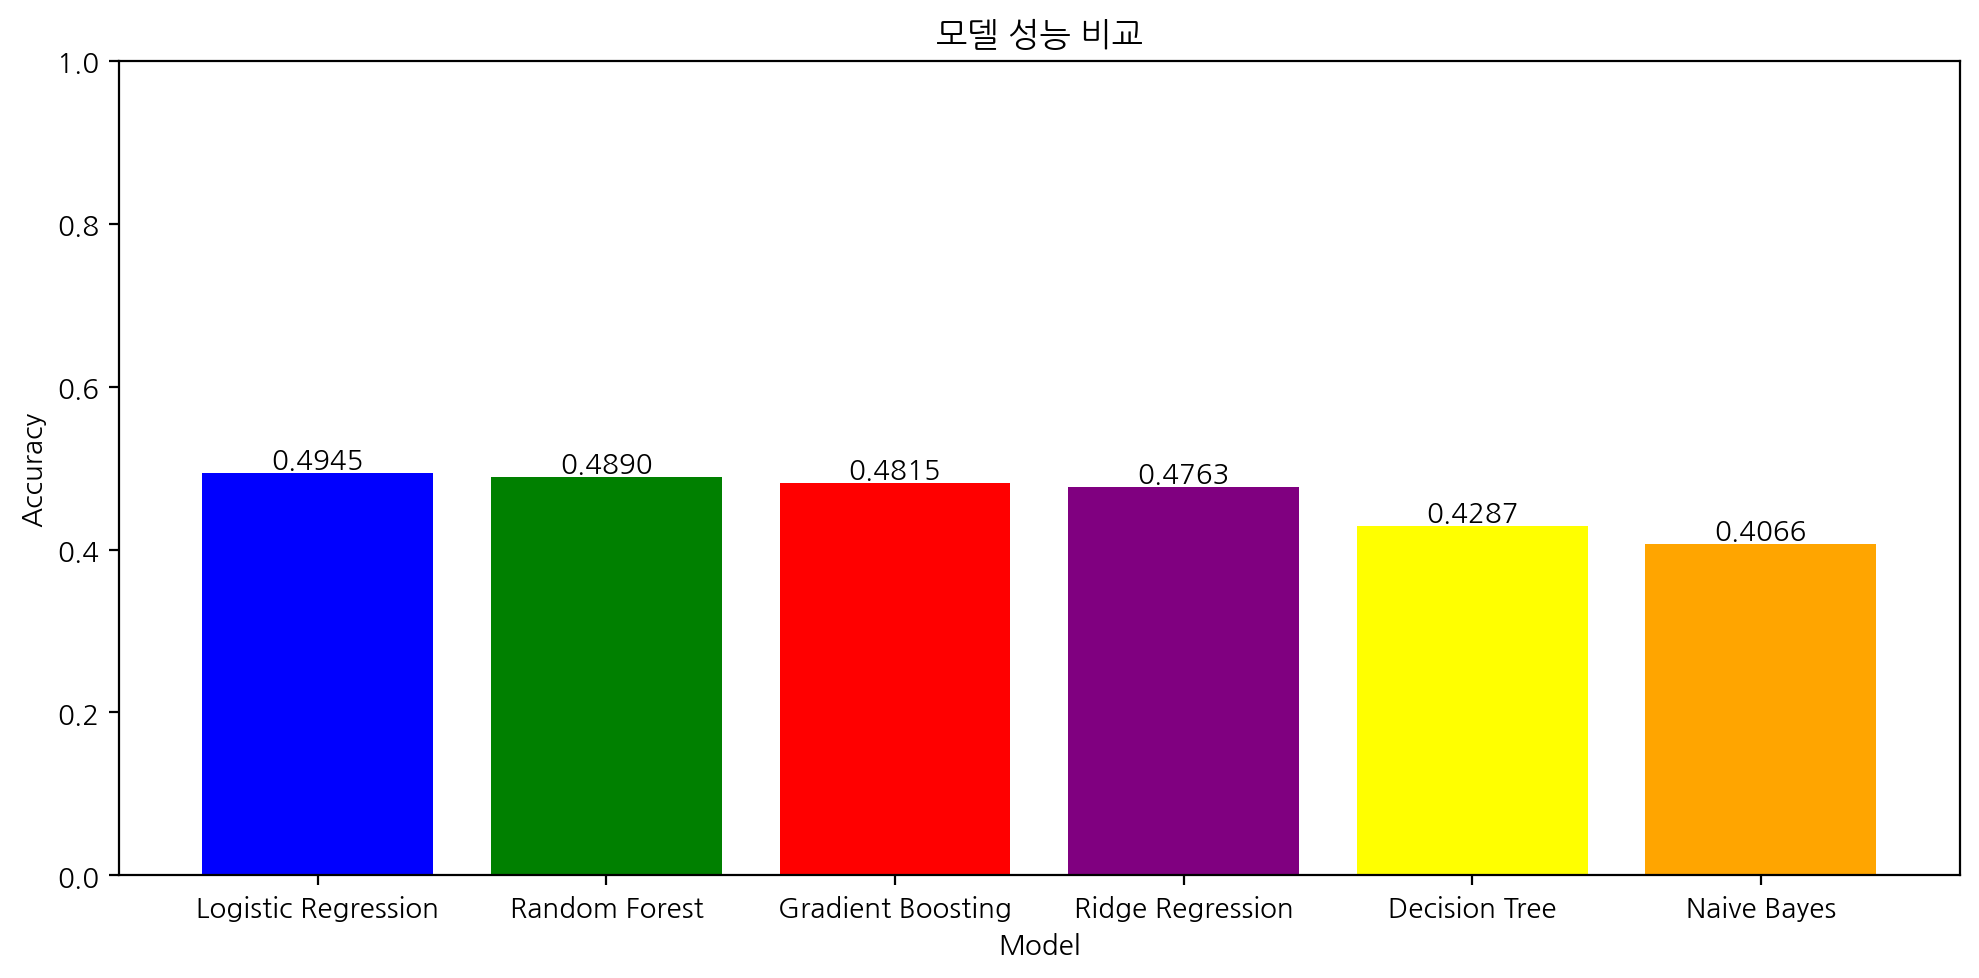

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X= reviews_mean['리뷰']
y= reviews_mean['평점']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(token_pattern = okt_clean,
                        decode_error = 'ignore',
                        stop_words = remove_stopwords,
                        lowercase=True,
                        ngram_range=(1,2)
                        )

tfidf_vectorizer.fit(X)  # X 전체에 대해 fit
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(tfidf_train, y_train)
  y_pred = model.predict(tfidf_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 다른 쇼핑몰 리뷰 데이터로 평점 예측하기

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력


전체 리뷰 개수 : 200000


In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


## 데이터 전처리

1. 중복 데이터 제외

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [ ]:
count = total_data['ratings'].value_counts()
count

5    81170
2    63948
1    36007
4    18783
Name: ratings, dtype: int64

In [ ]:
count2 = reviews['평점'].value_counts()
count2

5    2723
4    2705
3    2500
1    1183
2    1168
Name: 평점, dtype: int64

In [ ]:
df_copy = total_data.copy()

# 한글 제외 모두 제거

df_copy['reviews'] = df_copy['reviews'].str.replace("[^가-힣 ]","")
df_copy

<ipython-input-75-7aeff93a1975>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['reviews'] = df_copy['reviews'].str.replace("[^가-힣 ]","")


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요
...,...,...
199995,2,장마라그런가 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요


## 라벨링
- 1, 2점: 부정 (0)
- 4, 5점: 긍정 (1)


In [ ]:
df_copy['sentiment'] = np.select([df_copy.ratings > 3], [1], default=0)
df_copy


,ratings,reviews,sentiment
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...,0
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요,1
...,...,...,...
199995,2,장마라그런가 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요,1


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199908 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ratings    199908 non-null  int64 
 1   reviews    199908 non-null  object
 2   sentiment  199908 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [ ]:
# 각 평점별로 3000개 데이터 추출

samples = []
for rating in [1, 2, 4, 5]:
  subset = df_copy[df_copy['ratings'] == rating]

  sample_subset = subset.sample(n=3000, replace=False, random_state=42)
  samples.append(sample_subset)

df_3000 = pd.concat(samples, axis=0).reset_index(drop=True)
df_3000

,ratings,reviews,sentiment
0,1,친정집에 해주려고산건데 냄새가 너무심해요 냄새빠지라고 며칠밖에두고 닦고해도안돼요 벨...,0
1,1,졸라 잘부셔짐 최악의 내구성 입니다 그래도 싼맛에 잘써믐둥,0
2,1,포장상태 듣던대로 어마어마하네요 개 주문했는데 저 박스에 달랑 저렇게 왔네요 파손없...,0
3,1,사진에는 축구용 헤드벤드 해놓고 상품엔 없네요잘못샀네,0
4,1,포장상태 완전 엉망 심지에 밑에 뜯은 자국있음,0
...,...,...,...
11995,5,가성비 끝판왕 의자네요 괜차나여,1
11996,5,토끼들이 먹기편하게 싸이즈가 적당해요 이집건초를 좋아해서 구매합니다,1
11997,5,재구매 안녕하세요좋습니다,1
11998,5,저렴한가격에 두개사서 안방 거실 쓰네요,1


## 토큰화 / 불용어 제거

In [ ]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()

def tokenize(text, stopwords):
  return [word for word in okt.morphs(text) if word not in stopwords]

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '요']

df_3000['morphs'] = df_3000['reviews'].apply(lambda x: ' '.join(tokenize(x, stopwords)))

df_3000.head(10)



,ratings,reviews,sentiment,morphs
0,1,친정집에 해주려고산건데 냄새가 너무심해요 냄새빠지라고 며칠밖에두고 닦고해도안돼요 벨...,0,친정 집 해주려고 산건데 냄새 너무 심해 냄새 빠지라고 며칠 밖에 두고 닦고해 도안...
1,1,졸라 잘부셔짐 최악의 내구성 입니다 그래도 싼맛에 잘써믐둥,0,졸라 잘 부셔 짐 최악 내 구성 입니다 그래도 싼 맛 잘써믐둥
2,1,포장상태 듣던대로 어마어마하네요 개 주문했는데 저 박스에 달랑 저렇게 왔네요 파손없...,0,포장 상태 듣던대로 어마어마하네요 개 주문 했는데 저 박스 달랑 저렇게 왔네요 파손...
3,1,사진에는 축구용 헤드벤드 해놓고 상품엔 없네요잘못샀네,0,사진 에는 축구 용 헤드 벤드 해놓고 상품 엔 없네요 잘못 샀네
4,1,포장상태 완전 엉망 심지에 밑에 뜯은 자국있음,0,포장 상태 완전 엉망 심지 밑 뜯은 자국 있음
5,1,장화 바닦이 너무 얇음,0,장화 바 닦이 너무 얇음
6,1,재구매 지난번에 괜찮아서 같은 사이즈로 재구매 했는데 아 정말 욕나와요입자 마자 옆...,0,재구매 지난번 괜찮아서 같은 사이즈 로 재구매 했는데 아 정말 욕 나와요 입자 마자...
7,1,아직 사용전입니다만 배송은 빠릅니다,0,아직 사용 전입 니 다만 배송 빠릅니다
8,1,배송이 다른색으로 와서,0,배송 다른 색 으로 와서
9,1,다음에는 여기서 안 사요,0,다음 에는 여기 서 안 사


## 테스트 데이터 전처리
- 3점의 긍정부정을 1,2점 / 4,5점으로 나누기

In [ ]:
star3 = reviews_mean['평점'] == 3

# 부정 데이터(0) 1,2점 무작위 할당

## 무작위로 할당하는 배열의 크기 조정
star3_negative = star3 & (reviews_mean['긍정부정']==0)
count_negative = sum(star3_negative)
reviews_mean.loc[star3_negative, '평점'] = np.random.choice([1,2], size=count_negative)

# 긍정 데이터(1) 4,5점 무작위 할당

## 무작위로 할당하는 배열의 크기 조정
star3_positive = star3 & (reviews_mean['긍정부정']==1)
count_positive = sum(star3_positive)
reviews_mean.loc[star3_positive, '평점'] = np.random.choice([4,5], size=count_positive)


In [ ]:
count3 = reviews_mean['평점'].value_counts()
count3

5    3305
4    3299
1    1840
2    1835
Name: 평점, dtype: int64

## 데이터 분리


In [ ]:
from sklearn.model_selection import train_test_split

X = df_3000[['morphs', 'sentiment']]
y = df_3000['ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print('X_train size: ', len(X_train))
print('y_train size: ', len(y_train))
print('X_test size: ', len(X_test))
print('y_test size: ', len(y_test))



X_train size:  9000
y_train size:  9000
X_test size:  3000
y_test size:  3000


In [ ]:
# 분포 확인
print(X_train.groupby('sentiment').size().reset_index(name='count'))

   sentiment  count
0          0   4473
1          1   4527


In [ ]:
print(y_train.value_counts().reset_index(name='count'))

   index  count
0      4   2272
1      5   2255
2      1   2248
3      2   2225


- 데이터는 일정한 비율로 잘 나뉨

## 토큰화 / 벡터화

## 모델링

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['morphs'])
X_test_tfidf = tfidf.transform(X_test['morphs'])


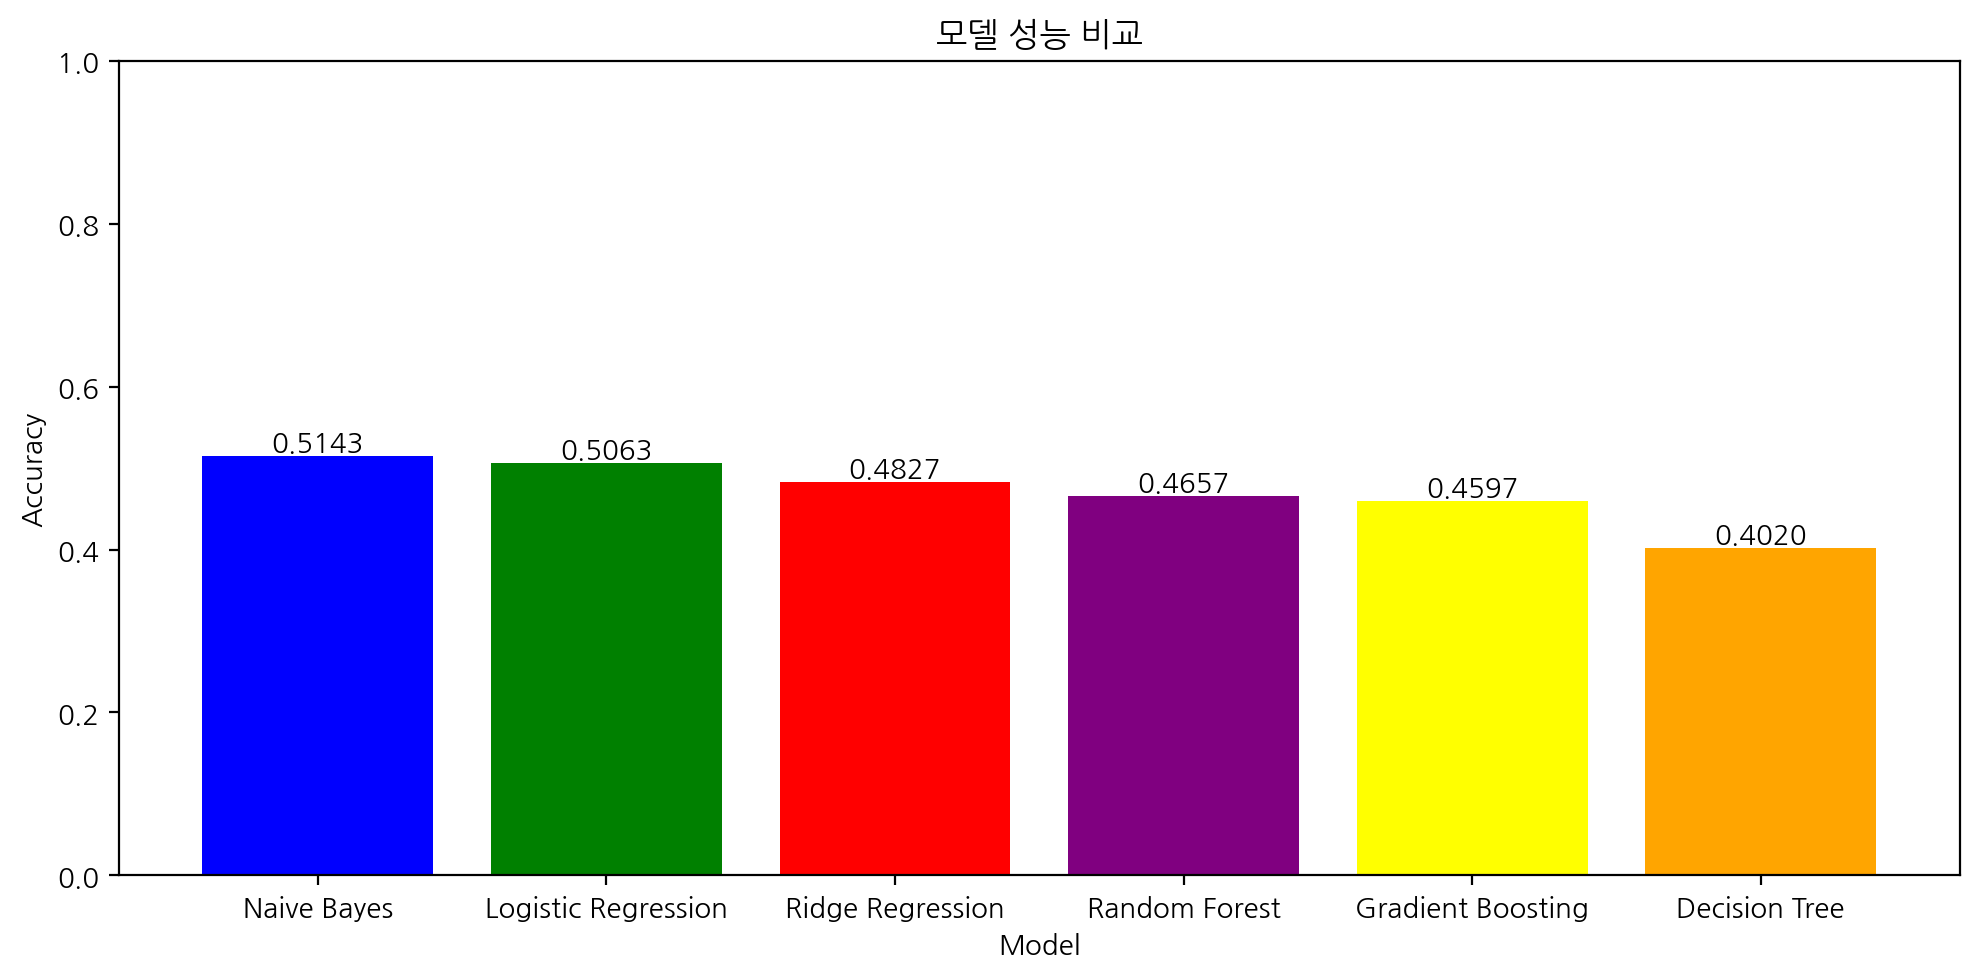

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# tfidf = TfidfVectorizer()

# tfidf.fit(X['morphs'])  # X 전체에 대해 fit
# X_train_tfidf = tfidf.transform(X_train['morphs'])
# X_test_tfidf = tfidf.transform(X_test['morphs'])

# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 나이브베이즈로 샴푸 리뷰 데이터 평점 예측

In [ ]:
reviews_mean_tfidf = tfidf.transform(reviews_mean['형태소'])

nb_model = models['Naive Bayes']
y_pred_mean = nb_model.predict(reviews_mean_tfidf)

accuracy_mean = accuracy_score(reviews_mean['평점'], y_pred_mean)

print('정확도: ', accuracy_mean)

정확도:  0.36394590913512986


## 많이 나오는 단어 빼고 해보기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


p_texts = df_3000[df_3000['sentiment']==1]['morphs']
vector1 = CountVectorizer()
X1 = vector1.fit_transform(p_texts)
word_freq1 = pd.DataFrame({'word':vector1.get_feature_names_out(),
                           'count':X1.sum(axis=0).tolist()[0]})
p_top20 = word_freq1.sort_values(by='count', ascending=False).head(20)

n_texts = df_3000[df_3000['sentiment']==0]['morphs']
vector0 = CountVectorizer()
X0 = vector0.fit_transform(n_texts)
word_freq0 = pd.DataFrame({'word':vector0.get_feature_names_out(),
                           'count':X0.sum(axis=0).tolist()[0]})
n_top20 = word_freq0.sort_values(by='count', ascending=False).head(20)

print('p_top20: ')
print(p_top20)
print('n_top20: ')
print(n_top20)


p_top20: 
        word  count
8949     좋아요   1050
4281      배송    934
1584      너무    687
8522     재구매    596
754       구매    575
5269      사용    487
1         가격    424
7708      으로    410
310      같아요    402
8922     좋네요    364
4489      보다    359
5466      생각    332
8787      제품    326
5001     빠르고    305
11033    했는데    303
8059     입니다    289
9103      주문    282
3290   만족합니다    274
8941    좋습니다    274
11060    했어요    263
n_top20: 
      word  count
2186    너무   1079
5670    배송    754
1099    그냥    670
11796   제품    461
5920    별로    432
14458  했는데    424
7372    생각    391
7129    사용    386
13906   하고    379
980     구매    371
10480   으로    346
6079    보다    336
11481  재구매    319
10945  입니다    310
1       가격    282
12070   주문    275
5481    반품    269
4404    많이    259
6298    부분    255
14334   해서    247


- 공통 단어 확인

In [ ]:
p_n_common = set(p_top20['word']).intersection(set(n_top20['word']))
print(p_n_common)

{'재구매', '배송', '으로', '보다', '구매', '생각', '제품', '가격', '주문', '했는데', '사용', '입니다', '너무'}


- 공통단어 제외 후 벡터화

In [ ]:
all_words = tfidf.get_feature_names_out()
selected_words = [word for word in all_words if word not in p_n_common]

from sklearn.model_selection import train_test_split

X = df_3000[['morphs', 'sentiment']]
y = df_3000['ratings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tfidf = TfidfVectorizer(vocabulary=selected_words)
X_train_tfidf = tfidf.fit_transform(X_train['morphs'])
X_test_tfidf = tfidf.transform(X_test['morphs'])

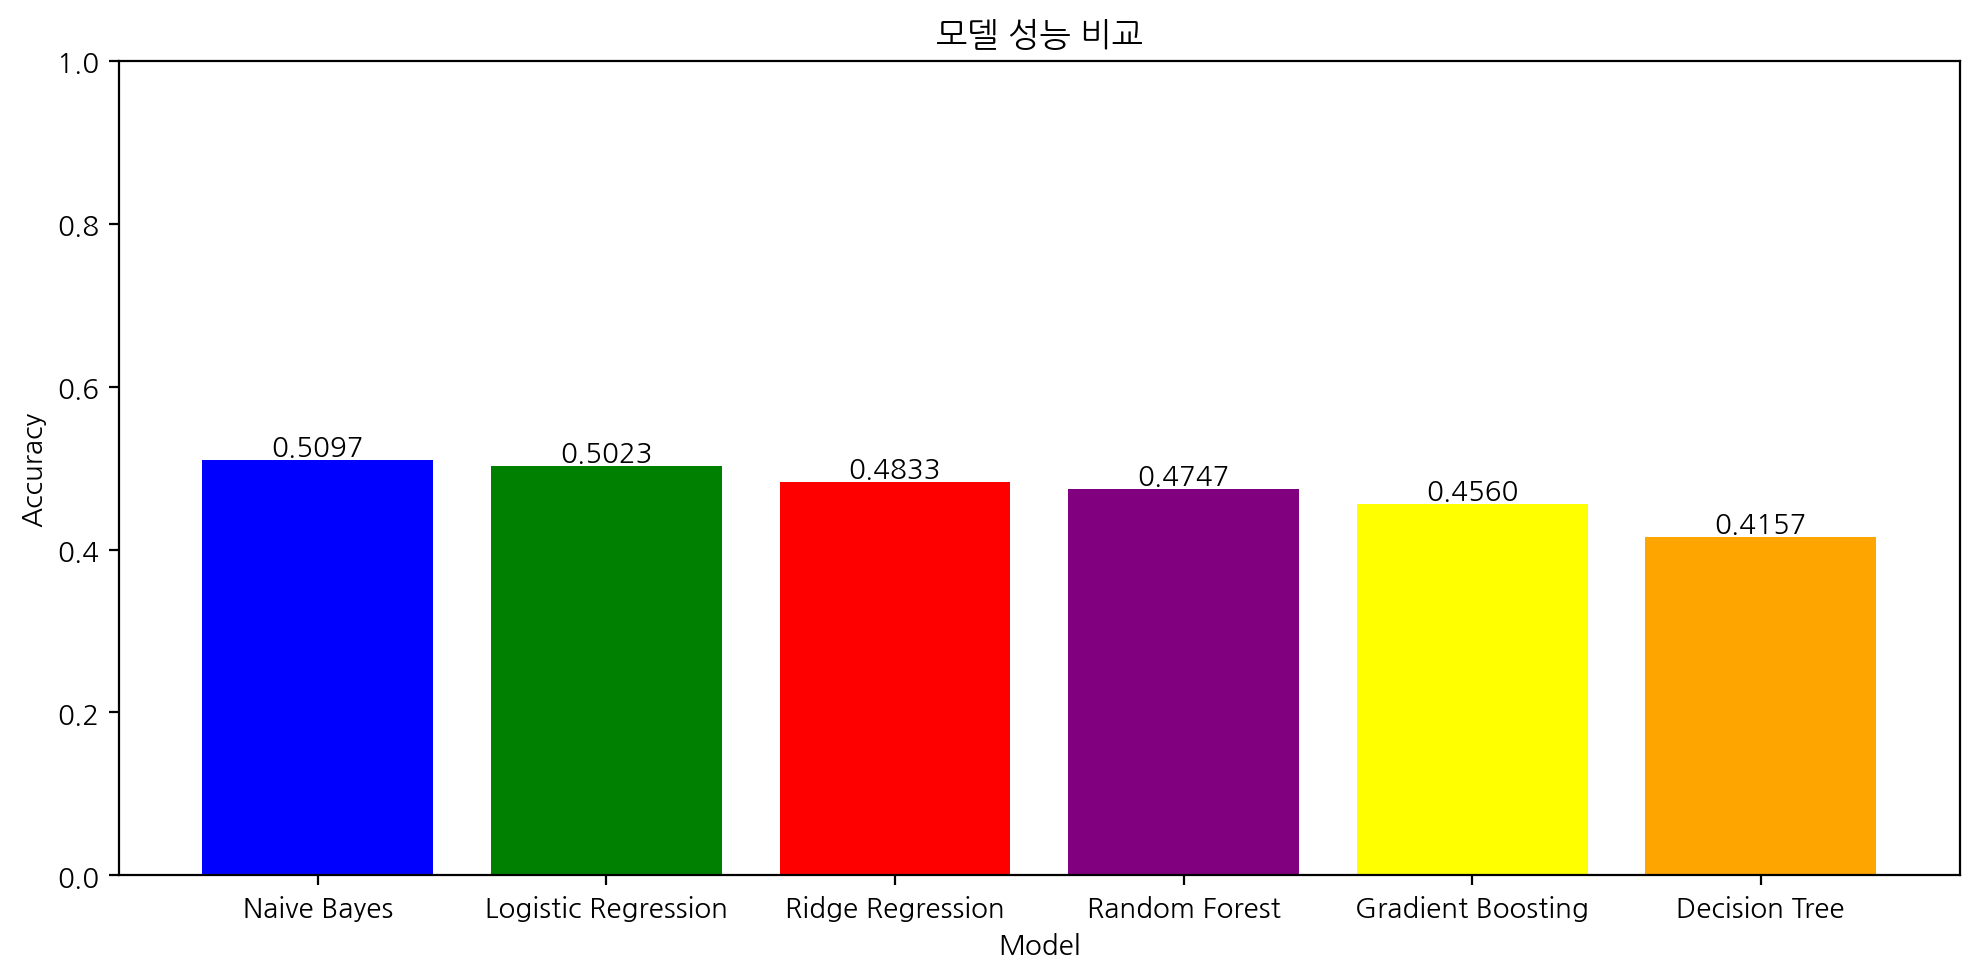

In [ ]:
# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 모델 예측
- 어째 정확도가 더 떨어짐

## 샴푸 데이터의 단어 수 많은거 제외해보기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


p_texts = reviews_mean[reviews_mean['긍정부정']==1]['형태소']
vector1 = CountVectorizer()
X1 = vector1.fit_transform(p_texts)
word_freq1 = pd.DataFrame({'word':vector1.get_feature_names_out(),
                           'count':X1.sum(axis=0).tolist()[0]})
p_top20 = word_freq1.sort_values(by='count', ascending=False).head(20)

n_texts = reviews_mean[reviews_mean['긍정부정']==0]['형태소']
vector0 = CountVectorizer()
X0 = vector0.fit_transform(n_texts)
word_freq0 = pd.DataFrame({'word':vector0.get_feature_names_out(),
                           'count':X0.sum(axis=0).tolist()[0]})
n_top20 = word_freq0.sort_values(by='count', ascending=False).head(20)

print('p_top20: ')
print(p_top20)
print('n_top20: ')
print(n_top20)


p_top20: 
     word  count
4944   좋다   7049
2905   샴푸   4791
2754   사용   3112
4554   있다   2916
4573   자다   2635
1416   두피   2603
1853   머리   2410
3426   쓰다   2211
281    거품   2102
3403   써다   1877
2374   보다   1810
4874   제품   1690
1395   되다   1433
5599   탈모   1426
543    구매   1424
3570   않다   1318
2639  빠지다   1086
1780   많이   1074
1057   느낌   1021
3770   없다    944
n_top20: 
     word  count
2112   샴푸   1527
3496   좋다   1496
2003   사용   1191
3238   있다   1069
2443   쓰다   1015
1363   머리    941
1047   두피    941
1736   보다    925
2421   써다    902
3252   자다    878
1434  모르다    735
2711   없다    720
1028   되다    706
2559   않다    664
3452   제품    614
1664   배송    606
394    구매    602
2508   아직    527
4399   효과    519
2827   오다    489


In [ ]:
p_n_common = set(p_top20['word']).intersection(set(n_top20['word']))
print(p_n_common)

{'좋다', '되다', '쓰다', '있다', '써다', '샴푸', '보다', '구매', '없다', '머리', '자다', '제품', '않다', '사용', '두피'}


In [ ]:
all_words = tfidf.get_feature_names_out()
selected_words = [word for word in all_words if word not in p_n_common]

X = reviews_mean[['형태소', '긍정부정']]
y = reviews_mean['평점']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tfidf = TfidfVectorizer(vocabulary=selected_words)
X_train_tfidf = tfidf.fit_transform(X_train['형태소'])
X_test_tfidf = tfidf.transform(X_test['형태소'])

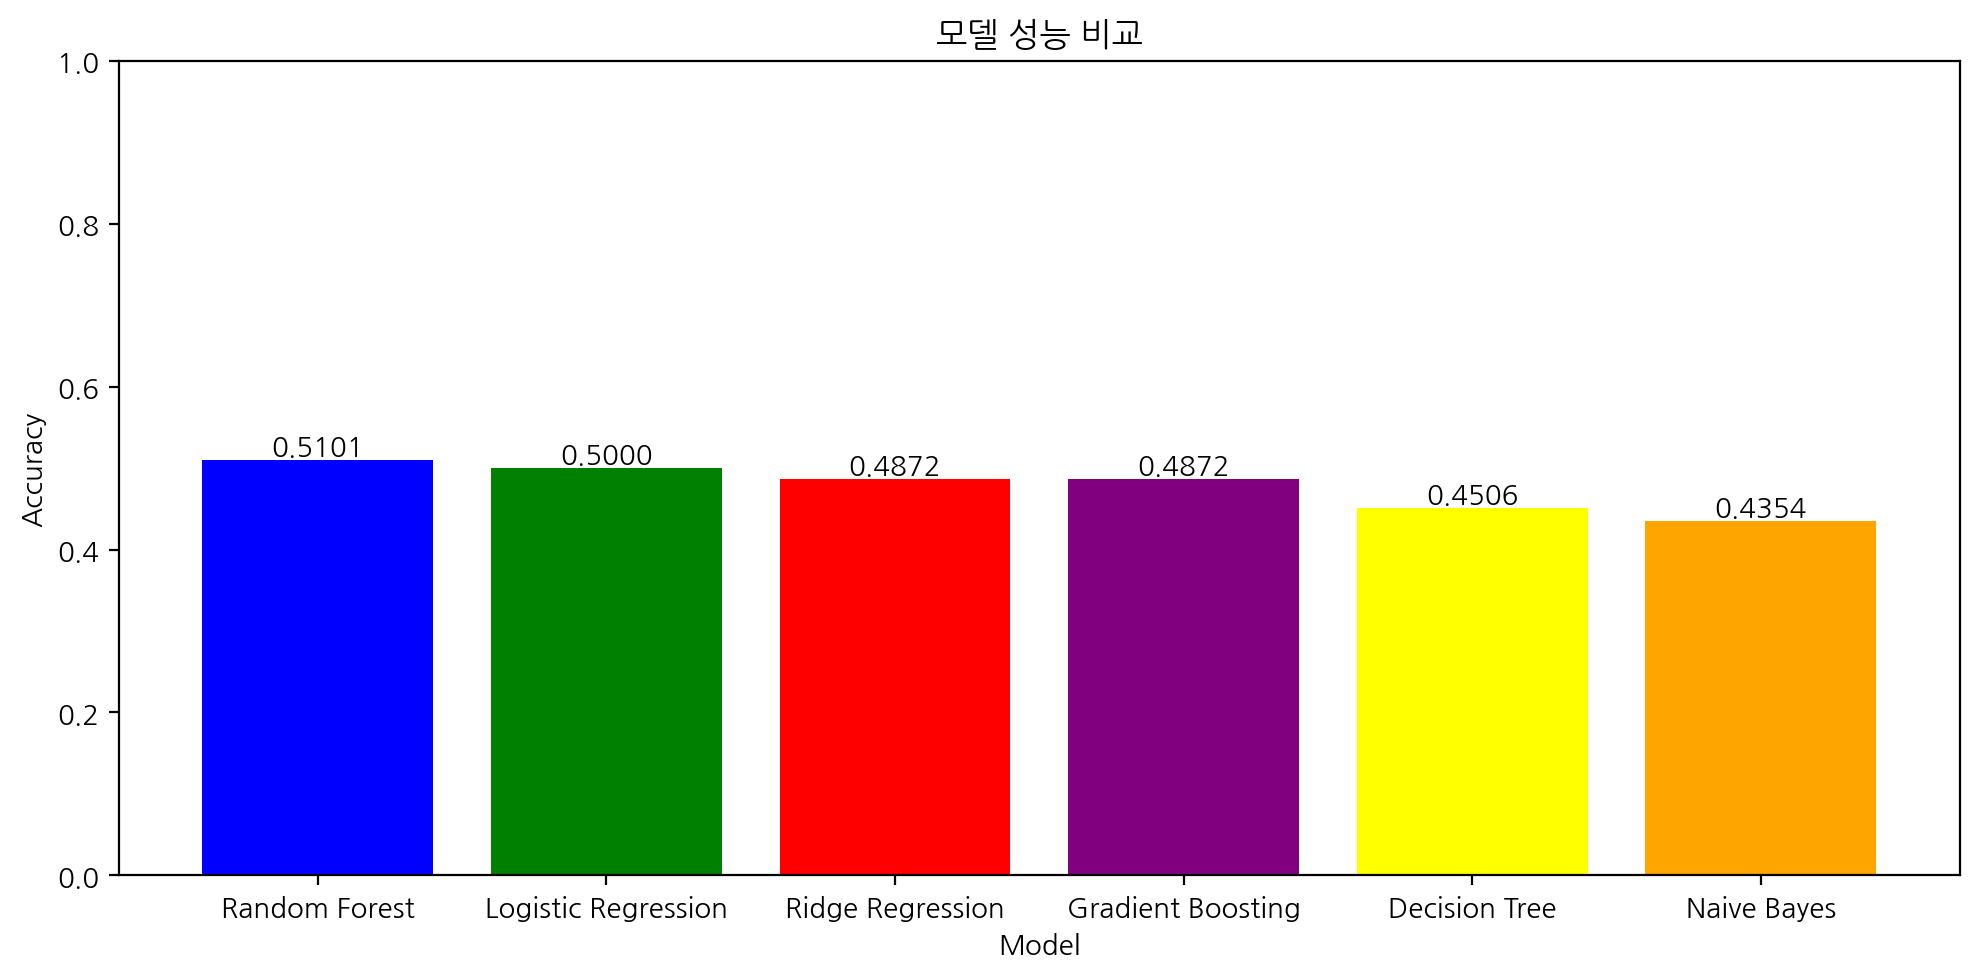

In [ ]:
# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 교차검증

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()

sorted_cv_scores = dict(sorted(cv_scores.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_cv_scores.keys())
values = list(sorted_cv_scores.values())

print(sorted_cv_scores)



{'Random Forest': 0.5375544877540903, 'Logistic Regression': 0.5157608169607049, 'Ridge Regression': 0.502140540740722, 'Gradient Boosting': 0.5000655662644315, 'Decision Tree': 0.46478342511768683, 'Naive Bayes': 0.4306659899622174}


## 모델링 결과
- 많이 나오는 단어 제거 전: 로지스틱회귀 (0.49)
- 제거 후: 랜덤포레스트 (0.51)
- 교차검증 하니까 랜덤포레스트 모델이 0.53으로 상승

## 한번만 나오는 단어들은 다 삭제해보기

In [ ]:
# 벡터화로 생성되는 총 단어의 수
total_words = len(tfidf.get_feature_names_out())
print('총 단어 수: ', total_words)

# 1번만 등장하는 단어 개수
word_counts = (X_train_tfidf>0).sum(axis=0).tolist()[0]
word_once = sum([1 for count in word_counts if count == 1])
print('1번만 나오는 단어 수: ', word_once)

# 1번만 나오는 단어 비중
total_docs = X_train_tfidf.shape[0]
one_time_ratio = word_once / total_docs * 100
print('비중: ', one_time_ratio)

총 단어 수:  17635
1번만 나오는 단어 수:  703
비중:  9.119211311454144


In [ ]:
# 공통 단어 제외
all_words = tfidf.get_feature_names_out()
selected_words = [word for word in all_words if word not in p_n_common]

# X_train 한번만 나오는 단어 찾기
count_vector = CountVectorizer(vocabulary=selected_words)
X_train_count = count_vector.fit_transform(X_train['형태소'])
word_counts = X_train_count.sum(axis=0).tolist()[0]
one_time_words = [word for word, count in zip(selected_words, word_counts) if count ==1]

# 한번만 나오는 단어 제외
final_words = [word for word in selected_words if word not in one_time_words]

X = reviews_mean[['형태소', '긍정부정']]
y = reviews_mean['평점']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tfidf = TfidfVectorizer(vocabulary=final_words)
X_train_tfidf = tfidf.fit_transform(X_train['형태소'])
X_test_tfidf = tfidf.transform(X_test['형태소'])

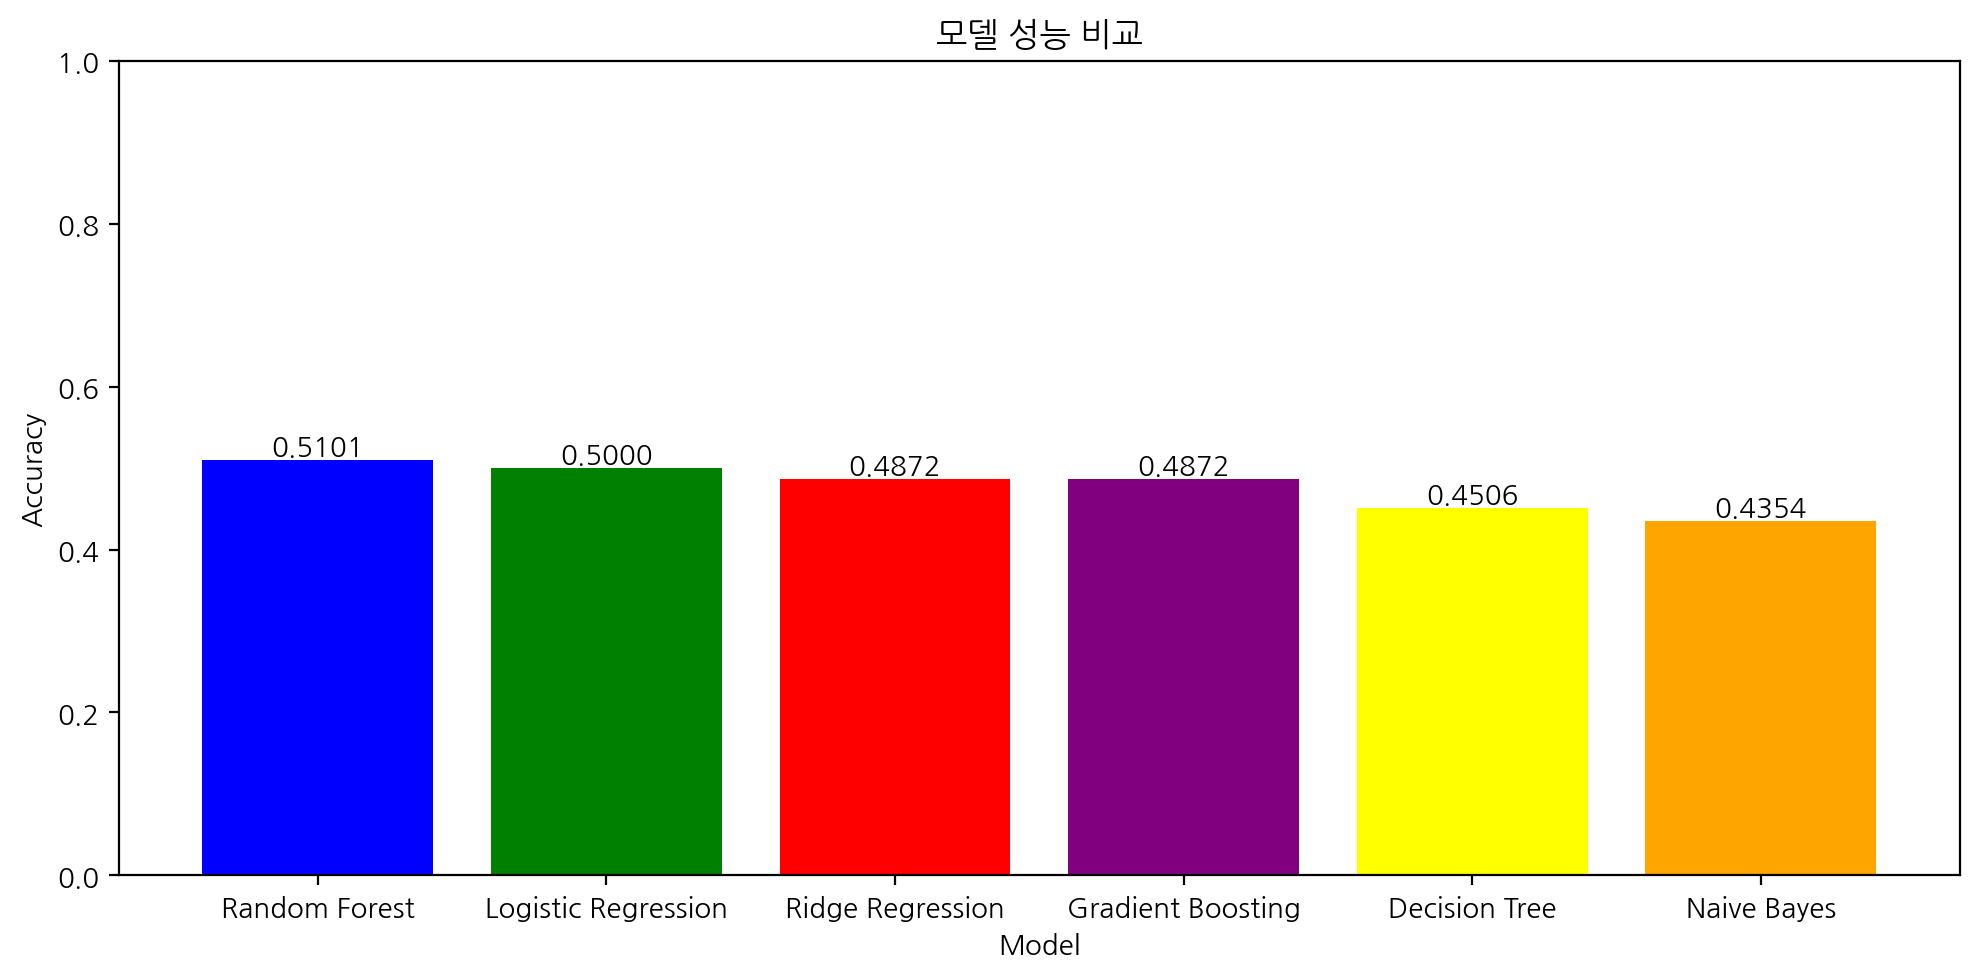

In [ ]:
# 모델 정의
models = {
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : MultinomialNB(),
    'Logistic Regression' : LogisticRegression(max_iter=1000, random_state=42),
    'Ridge Regression' : RidgeClassifier(random_state=42),
    'Gradient Boosting' : GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# 모델 학습, 평가 시각화
accuracies = {}

for name, model in models.items():
  model.fit(X_train_tfidf, y_train)
  y_pred = model.predict(X_test_tfidf)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 모델링 결과
- 한번만 나오는 단어까지 삭제했더니 정확도가 아주 미세하게 낮아졌음
- 큰 차이는 없는듯?

## 긍정부정 값 반영

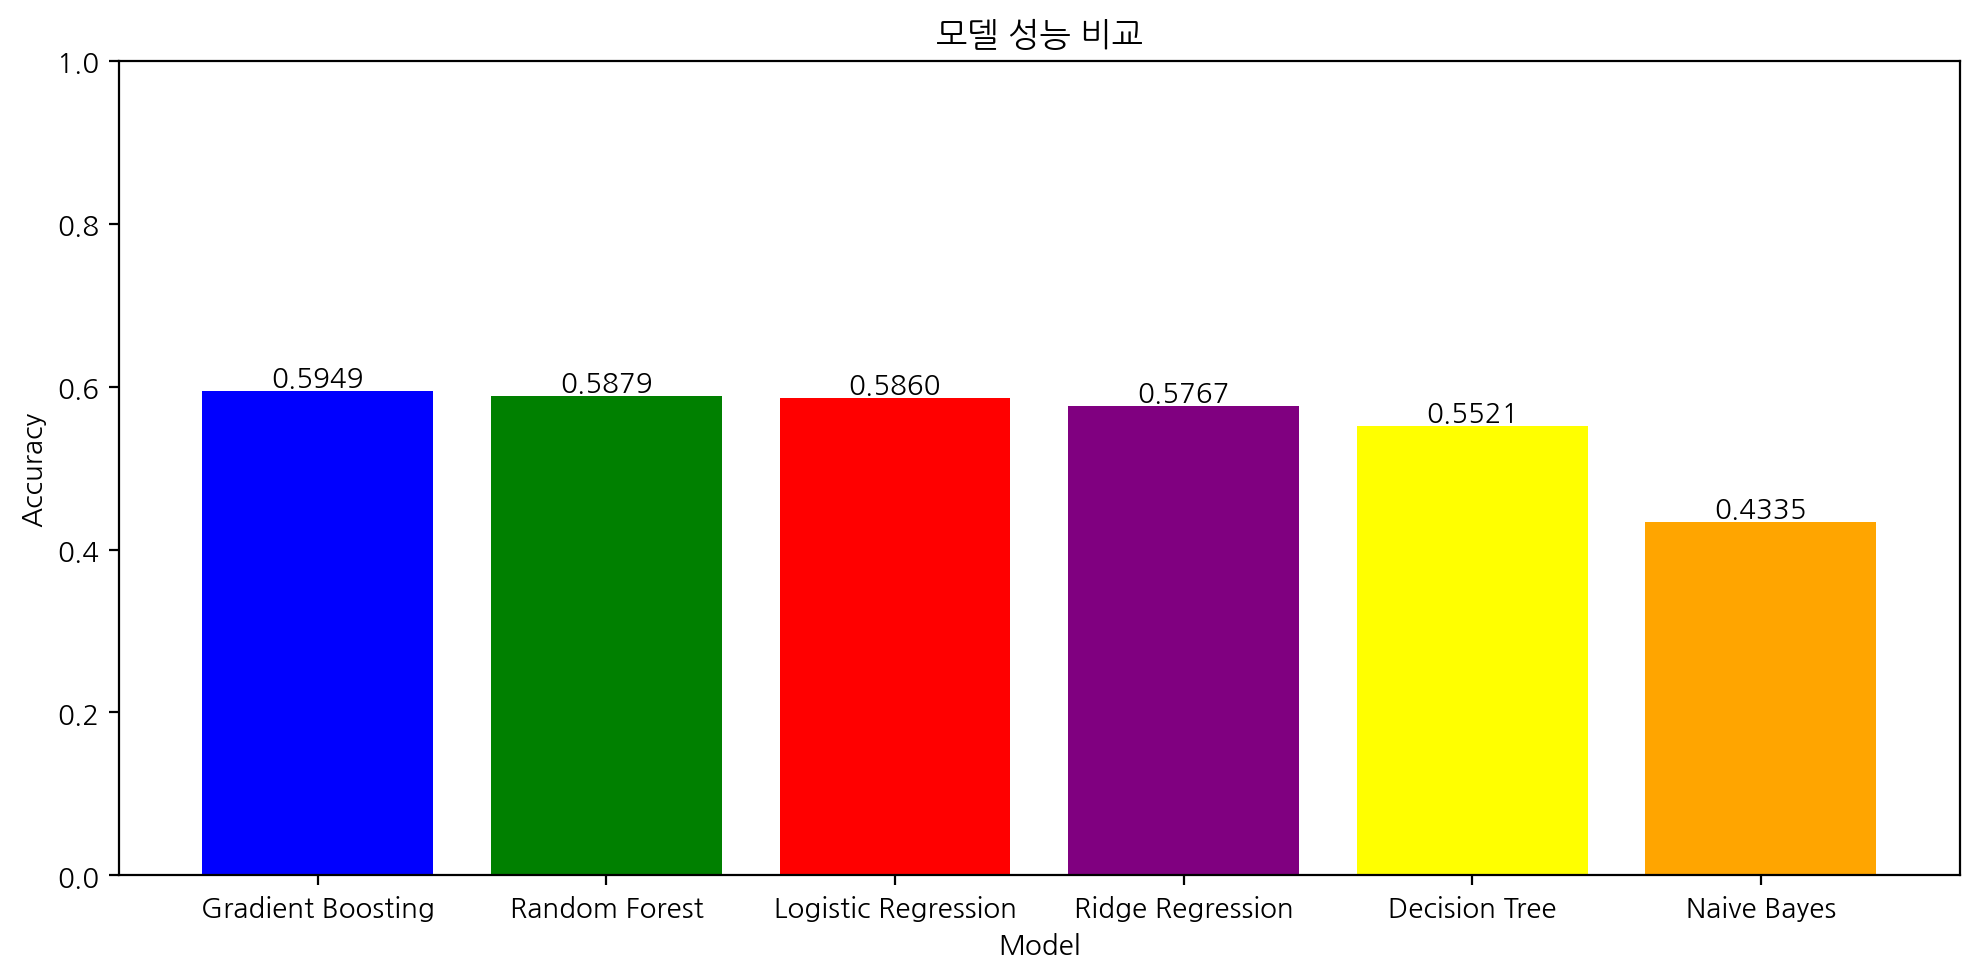

In [ ]:
from scipy.sparse import hstack

# TF-IDF 변환
tfidf = TfidfVectorizer(vocabulary=selected_words)
X_train_tfidf = tfidf.fit_transform(X_train['형태소'])
X_test_tfidf = tfidf.transform(X_test['형태소'])

# ['긍정부정'] 특성을 희소 행렬 형태로 변환
X_train_sentiment = X_train[['긍정부정']].values
X_test_sentiment = X_test[['긍정부정']].values

# 희소 행렬 형태로 변환된 ['긍정부정'] 특성을 TF-IDF 행렬과 결합
X_train_combined = hstack([X_train_tfidf, X_train_sentiment])
X_test_combined = hstack([X_test_tfidf, X_test_sentiment])

# 모델 학습 및 평가
accuracies = {}

for name, model in models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))
names = list(sorted_accuracies.keys())
values = list(sorted_accuracies.values())

# 그래프 그리기
plt.figure(figsize=(10,5))
bars = plt.bar(names, values, color = ['blue', 'green', 'red', 'purple', 'yellow', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('모델 성능 비교')
plt.ylim(0,1) # 정확도 범위

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
print(X_train_sentiment)

[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [ ]:
X_train_sentiment.shape

(7709, 1)

In [ ]:
print(X_train_combined)

  (0, 16781)	0.1649232791260794
  (0, 13940)	0.24582619715571735
  (0, 13189)	0.26852751778101097
  (0, 11717)	0.24941783404389442
  (0, 9845)	0.29967190699066015
  (0, 9320)	0.24841265413110591
  (0, 5264)	0.19481636701005794
  (0, 5082)	0.2731854291326876
  (0, 3383)	0.446343738897862
  (0, 2301)	0.5087866631891971
  (0, 1242)	0.23637071104448018
  (1, 16149)	0.1773221837583807
  (1, 15681)	0.5131717083778767
  (1, 14685)	0.16012818791113764
  (1, 13953)	0.17150079678186314
  (1, 12226)	0.1568722538823558
  (1, 11570)	0.2845631209856515
  (1, 7149)	0.36225422429752513
  (1, 5386)	0.1381435178891617
  (1, 5348)	0.21370604869990964
  (1, 5061)	0.35783047100387827
  (1, 2301)	0.19230408997918566
  (1, 529)	0.23963542318372957
  (1, 492)	0.19743436625474628
  (1, 58)	0.2952321176843495
  :	:
  (7666, 16957)	1.0
  (7667, 16957)	1.0
  (7669, 16957)	1.0
  (7670, 16957)	1.0
  (7671, 16957)	1.0
  (7674, 16957)	1.0
  (7676, 16957)	1.0
  (7679, 16957)	1.0
  (7680, 16957)	1.0
  (7681, 16957)	1.0

In [ ]:
X_train_combined.shape

(7709, 16958)